In [1]:
%pylab inline
import h5py
import mentari_v2 as mtr
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
#directory_dusty = "../dusty-sage/src/auxdata/trees/save-stellar-DTG/"
directory_dusty = "save-stellar-DTG/"
directory = "mini-millennium/"
#snap_limit = 63
BoxSize = ((62.5**3) * (2/8))**(1/3) #mini-millennium
firstfile = 0
lastfile = 1
Hubble_h = 0.73
#Generate SED
Age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
redshift = [127.000, 79.998, 50.000, 30.000, 19.916, 18.244, 16.725, 15.343, 14.086, 12.941, 11.897, 10.944, 10.073, 9.278, 8.550, 7.883, 7.272, 6.712, 6.197, 5.724, 5.289, 4.888, 4.520, 4.179, 3.866, 3.576, 3.308, 3.060, 2.831, 2.619, 2.422, 2.239, 2.070, 1.913, 1.766, 1.630, 1.504, 1.386, 1.276, 1.173, 1.078, 0.989, 0.905, 0.828, 0.755, 0.687, 0.624, 0.564, 0.509, 0.457, 0.408, 0.362, 0.320, 0.280, 0.242, 0.208, 0.175, 0.144, 0.116, 0.089, 0.064, 0.041, 0.020, 0.000]
print(redshift[27])
snaplim = [48, 40, 37, 32, 27]
z = [0.5, 1, 1.3, 2, 27]
snap_limit = snaplim[0]

3.06


In [3]:
mass_dusty, metals_dusty = mtr.build_mass_and_metallicity_history(1, directory_dusty, firstfile, lastfile, snap_limit)
dust, gas_metals, gas, rad  = mtr.build_dust_history(1, directory_dusty, firstfile, lastfile, snap_limit)

In [4]:
#Compute attenuation parameters
#w = np.where((mass_dusty[:,snap_limit] > 0) & (dust[:,snap_limit] > 0))[0]
w = np.where(mass_dusty[:,snap_limit] > 0)[0]
Mass = mass_dusty[w] / Hubble_h 
Metals = metals_dusty[w]

Dust = dust[w,snap_limit] / Hubble_h
Gas = gas[w,snap_limit] / Hubble_h
Rad = rad[w,snap_limit] / Hubble_h
eta_BC = [-0.7] * len(Dust)
eta_ISM_v2 = [-1.3] * len(Dust)

prescription = 0 #0 for Lagos+ 19; 1 for Somerville+ 12
tau_BC, eta_BC, tau_ISM, eta_ISM, Sigma_tau_ISM, Sigma_eta_ISM = mtr.compute_attenuation_parameters (prescription, Dust, Gas, Rad)


In [43]:
w = np.where(Dust > 0)[0]
Sigma_BC_d, tau_BC_d = mtr.compute_tauBC_Trayford(Dust[w], Gas[w], Rad[w])
Sigma_BC_s, tau_BC_s = mtr.compute_tauBC_Somerville(Dust[w], Rad[w])

Sigma_ISM_d, tau_ISM_d = mtr.compute_tauISM_Trayford(Dust[w], Gas[w], Rad[w])
Sigma_ISM_s, tau_ISM_s = mtr.compute_tauISM_Somerville(Dust[w], Rad[w])

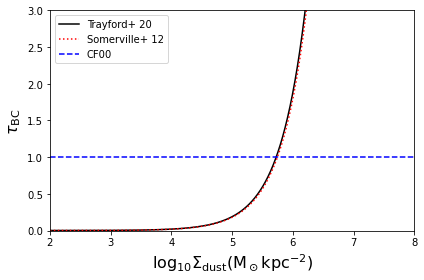

In [86]:
plt.plot(sort(Sigma_BC_d), sort(tau_BC_d), 'k-', label='Trayford+ 20')
plt.plot(sort(np.log10(Sigma_BC_s * 1e6)), sort(tau_BC_s), 'r:', label='Somerville+ 12')
plt.axhline(1, ls='--', c='b', label='CF00')
plt.legend(loc=0)
plt.xlim(2, 8)
plt.ylim(0, 3)
plt.xlabel(r'$\log_{10} \Sigma_\mathrm{dust} (\mathrm{M_\odot} \mathrm{kpc}^{-2})$', fontsize=16)
plt.ylabel(r'$\tau_\mathrm{BC}$', fontsize=16)
plt.tight_layout()
plt.savefig('plots/tau_bc.png')


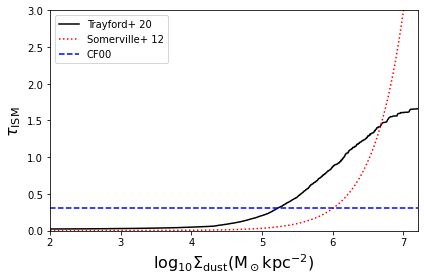

In [92]:
Sigma_dust_Trayford = [4.088, 4.351, 4.579, 4.823, 5.057, 5.292, 5.528, 5.765, 6.001, 6.234, 6.470, 6.704, 6.941, 7.177, 7.416]
tau_head_Trayford = [0.031, 0.059, 0.078, 0.129, 0.203, 0.308, 0.467, 0.647, 0.838, 1.065, 1.235, 1.475, 1.571, 1.645, 1.806]
tau_up_Trayford = [0.06, 0.105, 0.132, 0.211, 0.29, 0.435, 0.607, 0.805, 1.003, 1.241, 1.426, 1.664, 1.849, 1.967, 2.099]
tau_down_Trayford = [0.013, 0.026, 0.052, 0.092, 0.145, 0.237, 0.356, 0.528, 0.699, 0.898, 1.056, 1.162, 1.281, 1.347, 1.598]

#plt.plot(Sigma_dust_Trayford, tau_head_Trayford, label='Trayford+ 20')
#plt.fill_between(Sigma_dust_Trayford, tau_down_Trayford, tau_up_Trayford, color='black', label='Trayford+ 20')

plt.plot(sort(Sigma_ISM_d), sort(tau_ISM_d), 'k-', markersize=1.3, label='Trayford+ 20')
plt.plot(sort(np.log10(Sigma_ISM_s * 1e6)), sort(tau_ISM_s), 'r:', label='Somerville+ 12')
plt.axhline(0.3, ls='--', c='b', label='CF00')
plt.legend(loc=0)
plt.xlim(2, 7.2)
plt.ylim(0, 3)
plt.xlabel(r'$\log_{10} \Sigma_\mathrm{dust} (\mathrm{M_\odot} \mathrm{kpc}^{-2})$', fontsize=16)
plt.ylabel(r'$\tau_\mathrm{ISM}$', fontsize=16)
plt.tight_layout()
plt.savefig('plots/tau_ism_b.png')


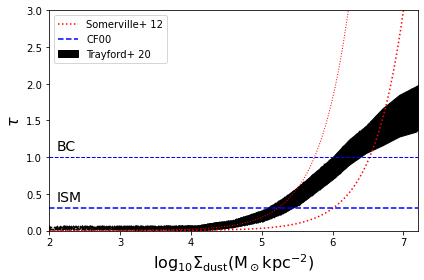

In [88]:
Sigma_dust_Trayford = [4.088, 4.351, 4.579, 4.823, 5.057, 5.292, 5.528, 5.765, 6.001, 6.234, 6.470, 6.704, 6.941, 7.177, 7.416]
tau_head_Trayford = [0.031, 0.059, 0.078, 0.129, 0.203, 0.308, 0.467, 0.647, 0.838, 1.065, 1.235, 1.475, 1.571, 1.645, 1.806]
tau_up_Trayford = [0.06, 0.105, 0.132, 0.211, 0.29, 0.435, 0.607, 0.805, 1.003, 1.241, 1.426, 1.664, 1.849, 1.967, 2.099]
tau_down_Trayford = [0.013, 0.026, 0.052, 0.092, 0.145, 0.237, 0.356, 0.528, 0.699, 0.898, 1.056, 1.162, 1.281, 1.347, 1.598]

#plt.plot(Sigma_dust_Trayford, tau_head_Trayford, label='Trayford+ 20')
plt.fill_between(Sigma_dust_Trayford, tau_down_Trayford, tau_up_Trayford, color='black', label='Trayford+ 20')

plt.plot((Sigma_ISM_d), (tau_ISM_d), 'k.', markersize=1.3)
#plt.plot(sort(Sigma_ISM_d), sort(tau_ISM_d), 'k.', label='Trayford+ 20')
plt.plot(sort(np.log10(Sigma_ISM_s * 1e6)), sort(tau_ISM_s), 'r:', label='Somerville+ 12')
plt.axhline(0.3, ls='--', c='b', label='CF00')

#plt.plot(sort(Sigma_BC_d), sort(tau_BC_d), 'k-', lw=1)
plt.plot(sort(np.log10(Sigma_BC_s * 1e6)), sort(tau_BC_s), 'r:', lw=1)
plt.axhline(1, ls='--', c='b', lw=1)
plt.legend(loc=0)
plt.xlim(2, 7.2)
plt.ylim(0, 3)
plt.xlabel(r'$\log_{10} \Sigma_\mathrm{dust} (\mathrm{M_\odot} \mathrm{kpc}^{-2})$', fontsize=16)
plt.ylabel(r'$\tau$', fontsize=16)
plt.text(2.1, 1.1, 'BC', fontsize=14)
plt.text(2.1, 0.4, 'ISM', fontsize=14)
plt.tight_layout()
plt.savefig('plots/tau.png')


(4.0, 7.0)

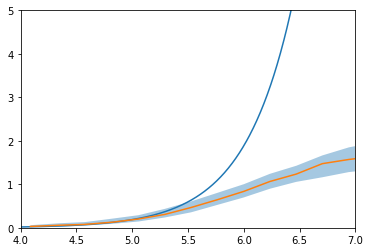

In [67]:
plt.plot(sort(Sigma_BC_d), sort(tau_BC_d), '-')

Sigma_dust_Trayford = [4.088, 4.351, 4.579, 4.823, 5.057, 5.292, 5.528, 5.765, 6.001, 6.234, 6.470, 6.704, 6.941, 7.177, 7.416]
tau_head_Trayford = [0.031, 0.059, 0.078, 0.129, 0.203, 0.308, 0.467, 0.647, 0.838, 1.065, 1.235, 1.475, 1.571, 1.645, 1.806]
tau_up_Trayford = [0.06, 0.105, 0.132, 0.211, 0.29, 0.435, 0.607, 0.805, 1.003, 1.241, 1.426, 1.664, 1.849, 1.967, 2.099]
tau_down_Trayford = [0.013, 0.026, 0.052, 0.092, 0.145, 0.237, 0.356, 0.528, 0.699, 0.898, 1.056, 1.162, 1.281, 1.347, 1.598]

plt.plot(Sigma_dust_Trayford, tau_head_Trayford, label='Trayford+ 20')
plt.fill_between(Sigma_dust_Trayford, tau_down_Trayford, tau_up_Trayford, alpha=0.4)

plt.ylim(0, 5)
plt.xlim(4, 7)

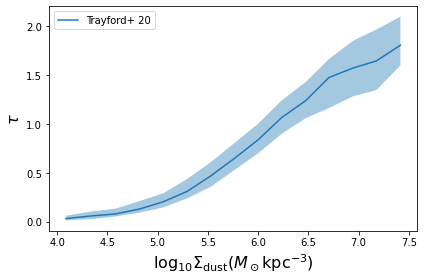

In [5]:
Sigma_dust_Trayford = [4.088, 4.351, 4.579, 4.823, 5.057, 5.292, 5.528, 5.765, 6.001, 6.234, 6.470, 6.704, 6.941, 7.177, 7.416]
tau_head_Trayford = [0.031, 0.059, 0.078, 0.129, 0.203, 0.308, 0.467, 0.647, 0.838, 1.065, 1.235, 1.475, 1.571, 1.645, 1.806]
tau_up_Trayford = [0.06, 0.105, 0.132, 0.211, 0.29, 0.435, 0.607, 0.805, 1.003, 1.241, 1.426, 1.664, 1.849, 1.967, 2.099]
tau_down_Trayford = [0.013, 0.026, 0.052, 0.092, 0.145, 0.237, 0.356, 0.528, 0.699, 0.898, 1.056, 1.162, 1.281, 1.347, 1.598]

plt.plot(Sigma_dust_Trayford, tau_head_Trayford, label='Trayford+ 20')
plt.fill_between(Sigma_dust_Trayford, tau_down_Trayford, tau_up_Trayford, alpha=0.4)
#plt.plot(Sigma_dust_Trayford, tau_up_Trayford)
#plt.plot(Sigma_dust_Trayford, tau_down_Trayford)
plt.legend(loc='upper left')
plt.ylabel(r'$\tau$', fontsize=16)
plt.xlabel('$\log_{10} \Sigma_\mathrm{dust} (M_\odot \mathrm{kpc}^{-3})$', fontsize=16)
'''
tau_ISM_a = np.zeros(len(Dust))
Sigma_dust = np.zeros(len(Dust))

w = np.where(Dust > 0)[0]
ScaleRad = Rad[w] * 1e3 #convert to kpc
halfrad = 1.68 * ScaleRad
threerad = 0.4 * ScaleRad
Sigma_MW = 85 * 1e6 #Msun/kpc2

area = mtr.compute_area(threerad)

Sigma_dust[w] = np.log10(Dust[w] / area)
#Sigma_dust = np.log10(fdust * Sigma_gas)
tau_ISM_a[w] = np.interp(Sigma_dust[w], Sigma_dust_Trayford, tau_head_Trayford)
tau_up =  np.interp(Sigma_dust, Sigma_dust_Trayford, tau_up_Trayford)
tau_down = np.interp(Sigma_dust, Sigma_dust_Trayford, tau_down_Trayford)

tau = []
for i in range(len(tau_up)):
    if np.isnan(tau_up[i]):   #while y == nan:
        tau.append(nan)
        continue
    tau.append(np.random.uniform(tau_up[i], tau_down[i]))
#tau = np.random.uniform(tau_up, tau_down)

#plt.scatter(Sigma_tau_ISM, tau_ISM, marker='.')
plt.scatter(Sigma_dust, tau_ISM_a, marker='.')
#plt.scatter(Sigma_dust, tau, marker='.')
plt.xlim(4, 7.5)
print(tau_ISM[0:10], tau_ISM_a[0:10])
'''
plt.tight_layout()
#plt.savefig('plots/attenuation.png')

/var/folders/yy/5nly74gn5m381bhx3tk4z3580000gs/T/ipykernel_3072/3904112664.py:14: RuntimeWarning: invalid value encountered in true_divide
  Sigma_dust = np.log10(Dust / area)
/var/folders/yy/5nly74gn5m381bhx3tk4z3580000gs/T/ipykernel_3072/3904112664.py:14: RuntimeWarning: divide by zero encountered in log10
  Sigma_dust = np.log10(Dust / area)


ValueError: x and y must have same first dimension, but have shapes (7362,) and (8070,)

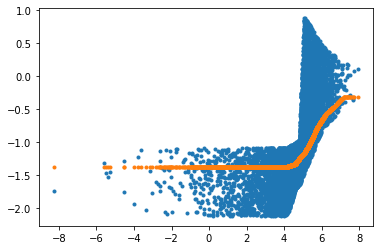

In [6]:
Sigma_dust_Trayford = [4.116, 4.354, 4.588, 4.822, 5.061, 5.293, 5.533, 5.763, 6.003, 6.236, 6.469, 6.706, 6.943, 7.181, 7.411]
eta_ISM_Trayford = [-1.379, -1.357, -1.334, -1.243, -1.170, -1.062, -0.922, -0.778, -0.668, -0.570, -0.506, -0.453, -0.381, -0.318, -0.307]
eta_ISM_down = [-2.12, -1.96, -1.71, -1.64, -1.5, -1.32, -1.16, -0.99, -0.84, -0.74, -0.68, -0.606, -0.5, -0.42, -0.4]
eta_ISM_up = [-1.08, -1.049, -1.016, -0.96, 0.91, 0.803, 0.696, 0.58, 0.508, 0.41, 0.37, 0.327, 0.237, 0.172, 0.196]
#area = compute_area(halfrad)

ScaleRad = Rad * 1e3 #convert to kpc
halfrad = 1.68 * ScaleRad
threerad = 0.4 * ScaleRad
Sigma_MW = 85 * 1e6 #Msun/kpc2

area = mtr.compute_area(threerad)

Sigma_dust = np.log10(Dust / area)
#Sigma_dust = np.log10(fdust * Sigma_gas)
eta_ISM_a = np.interp(Sigma_dust, Sigma_dust_Trayford, eta_ISM_Trayford)
eta_up =  np.interp(Sigma_dust, Sigma_dust_Trayford, eta_ISM_up)
eta_down = np.interp(Sigma_dust, Sigma_dust_Trayford, eta_ISM_down)

eta = []
for i in range(len(eta_up)):
    if np.isnan(eta_up[i]):   #while y == nan:
        eta.append(nan)
        continue
    eta.append(np.random.uniform(eta_up[i], eta_down[i]))
    
plt.plot(Sigma_dust, eta, '.')
plt.plot(Sigma_dust, eta_ISM_a, '.')
plt.plot(Sigma_eta_ISM, eta_ISM, '.')


In [ ]:
Age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
time_BC = 10**7
SSP = 0 #0 for BC03
wavelength, spectra, spectra_dusty = mtr.generate_SED(0, Age, Mass, Metals, 
             tau_BC, tau_ISM, eta_BC, eta_ISM, time_BC)
#wavelength_a, spectra_a, spectra_dusty_a = mtr.generate_SED(0, Age, Mass, Metals, 
#             tau_BC, tau, eta_BC, eta, time_BC)

In [ ]:
wavelength_IR, spectra_IR = mtr.add_IR_Dale(wavelength, spectra, spectra_dusty)
#wavelength_IR_a, spectra_IR_a = mtr.add_IR_Dale(wavelength_a, spectra_a, spectra_dusty_a)

In [ ]:
Dale_template = np.loadtxt('files/spectra.0.00AGN.dat', unpack=True)
lambda_IR = Dale_template[0] * 1e4 #convert from micron to Angstrom

Ldust = (spectra - spectra_dusty)
w = np.where(wavelength < 912)[0]
idx_912 = w[-1]

all_wave = np.unique(np.concatenate((wavelength, lambda_IR)))
all_wave.sort(kind='mergesort')
UVIR = np.zeros((len(Ldust), len(all_wave)))

for i in range(len(Ldust)):
    LIR_mentari = np.trapz(Ldust[i][idx_912:-1], wavelength[idx_912:-1])
#        LIR_mentari = np.trapz(Ldust[i], wavelength)
    #---------------------------------------------------
    '''
    #Compute alpha based on Rieke+ 2009
    if (LIR_mentari > 10**11.6):  
        LIR_mentari = 10**11.6

    alpha = 10.096 - 0.741 * np.log10(LIR_mentari)

    delta_alpha = abs(alpha_SF - alpha)
    idx = np.where(delta_alpha==min(delta_alpha))[0]

    #----------------------------------------------------
    #Compute log_fnu based on Marcillac+ 2006
    log_fnu = 0.128 * np.log10(LIR_mentari) - 1.611
    delta_fnu = abs(log_fnu_SF - log_fnu)
    idx = np.where(delta_fnu==min(delta_fnu))[0]
    #----------------------------------------------------
    '''
    idx = mtr.determine_idx_Marcillac(LIR_mentari)
#        alpha_SF, log_fnu_SF = np.loadtxt('files/alpha.dat', unpack=True)
#        idx = np.where(alpha_SF == 1.0)[0]
    print(Dust[i], spectra_dusty[i])
    spectra_IR = 10 ** Dale_template[idx[0]+1] 

    LIR_dale = np.trapz(spectra_IR, lambda_IR)
    scaling = LIR_mentari / LIR_dale
    spectra_IR_dale = spectra_IR * scaling 

    wa = np.where((all_wave < wavelength[-1]) | (all_wave == wavelength[-1]))[0]
    UVIR[i][wa] += np.interp(all_wave[wa], wavelength, spectra_dusty[i])

    we = np.where((all_wave > lambda_IR[0]) | (all_wave == lambda_IR[0]))[0]
    UVIR[i][we] += np.interp(all_wave[we], lambda_IR, spectra_IR_dale)

In [ ]:
wave_FIR, spec_FIR = mtr.compute_IR_SUNRISE (Dust, wavelength, spectra, spectra_dusty)

In [ ]:
len(spec_FIR), len(spectra_IR)

In [ ]:
wavelength_IR_b, spectra_IR_b = mtr.combine_Dale_SUNRISE(Dust, wavelength, spectra, spectra_dusty)

In [ ]:
output = "output/mentari_output_" + str(1) + ".hdf5"
with h5py.File(output, 'w') as f:
    if os.path.isfile(output) == 0
    f.create_dataset('StellarMass', data=mass_dusty, maxshape=(None,snap_limit+1), chunks=True, compression="gzip")


In [ ]:
import os.path
output = "output/mentari_output_" + str(0) + ".hdf5"
test = os.path.isfile(output) 
if os.path.isfile(output):
    print ("ok")

In [ ]:
with h5py.File('mentari_test7.h5', 'a') as f:
    f.create_dataset('StellarMass', data=Mass, maxshape=(None,snap_limit+1))
    f.create_dataset('Metallicity', data=Metals, maxshape=(None,snap_limit+1))
    f.create_dataset('DustMass', data=Dust, maxshape=(None,))
    f.create_dataset('GasMass', data=Gas, maxshape=(None,))
    f.create_dataset('Radius', data=Rad, maxshape=(None,))
    f.create_dataset('Wavelength_UVIR', data=wavelength_IR, maxshape=(None,))
    f.create_dataset('Spectra_UVIR', data=spectra_IR, maxshape=(None,len(wavelength_IR)))
    f.create_dataset('Wavelength_stellar', data=wavelength, maxshape=(None,))
    f.create_dataset('Spectra_stellar', data=spectra, maxshape=(None,len(wavelength)))
    f.create_dataset('Wavelength_SUNRISE', data=wavelength_IR_b, maxshape=(None,))
    f.create_dataset('Spectra_SUNRISE', data=spectra_IR_b, maxshape=(None,len(wavelength_IR_b)))


## Process per file -- and save per file as well

## reading mentari output

In [ ]:
directory_input = "../dusty-sage/src/auxdata/trees/save-stellar-DTG/"
snap_limit = 63
firstfile = 0
lastfile = 1
Hubble_h = 0.73
directory_output = "output_v2/"

save_spectra(directory_input, firstfile, lastfile, snap_limit, directory_output, Hubble_h)

In [ ]:
Age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
    
mass_dusty, metals_dusty = mtr.build_mass_and_metallicity_history(1, directory_input, 0, 0, snap_limit)
dust, gas_metals, gas, rad  = mtr.build_dust_history(1, directory_input, 0, 0, snap_limit)


In [ ]:
w = np.where((mass_dusty[:,snap_limit] > 0) & (dust[:,snap_limit] > 0))[0]
Mass = mass_dusty[w] / Hubble_h 
Metals = metals_dusty[w]

Dust = dust[w,snap_limit] / Hubble_h
Gas = gas[w,snap_limit] / Hubble_h
Rad = rad[w,snap_limit] / Hubble_h

prescription = 0 #0 for Lagos+ 19; 1 for Somerville+ 12
tau_BC, eta_BC, tau_ISM, eta_ISM = mtr.compute_attenuation_parameters (prescription, Dust, Gas, Rad)

#Model Variants 1: Lagos + Dale + Safarzadeh
time_BC = 10**7
SSP = 0 #0 for BC03 
wavelength, spectra, spectra_dusty = mtr.generate_SED(0, Age, Mass, Metals, 
             tau_BC, tau_ISM, eta_BC, eta_ISM, time_BC)

In [ ]:
#Model Variants 1: Lagos + Dale + Safarzadeh
wavelength_m1, spectra_m1 = mtr.combine_Dale_SUNRISE(Dust, wavelength, spectra, spectra_dusty)

In [ ]:
#Model Variants 2: Lagos + Dale
wavelength_m2, spectra_m2 = mtr.add_IR_Dale(wavelength, spectra, spectra_dusty)

In [ ]:
#Checking differences of both model

#low_wave = np.log10(3.6 * 1e4)
#up_wave = np.log10(8 * 1e4)
low_wave = np.log10(29650)
up_wave = np.log10(41650)

plt.plot(np.log10(wavelength_m1), np.log10(spectra_m1[100]))
plt.plot(np.log10(wavelength_m2), np.log10(spectra_m2[100]))
plt.xlim(low_wave, up_wave)


In [ ]:
filter_list = ['IRAC_1', 'IRAC_2', 'IRAC_3', 'IRAC_4']

z = 0 

#mab1 = mtr.compute_mab(wavelength_m1, spectra_m1, filter_list, z)
#mab2 = mtr.compute_mab(wavelength_m2, spectra_m2, filter_list, z)

In [ ]:
F = mtr.read_filters()

filters_wave = eval('F.' + filter_list[0] + '_wave')
filters = eval('F.' + filter_list[0])
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0

plt.plot(filters_wave, filters)

filters_wave = eval('F.' + filter_list[1] + '_wave')
filters = eval('F.' + filter_list[1])
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0

plt.plot(filters_wave, filters)

filters_wave = eval('F.' + filter_list[2] + '_wave')
filters = eval('F.' + filter_list[2])
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0

plt.plot(filters_wave, filters)

filters_wave = eval('F.' + filter_list[3] + '_wave')
filters = eval('F.' + filter_list[3])
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0

plt.plot(filters_wave, filters)

plt.xscale('log')
plt.yscale('log')

In [ ]:
from scipy.integrate import simps
c = 2.9979e18
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, z)
filt_int  = np.interp(wavelength, filters_wave, filters)
filtSpec = filt_int * spectrum
flux = simps(filtSpec, wavelength)
I1 = simps(spectrum*filt_int*wavelength,wavelength)
I2 = simps(filt_int/wavelength, wavelength) 
fnu = I1/I2/c
mAB = -2.5*np.log10(fnu) - 48.6

#filt_int_c  = np.interp(wavelength, filters_wave_c, filters_c)
#filtSpec_c = filt_int_c * spectrum

#plt.plot(wavelength, filt_int)
#plt.plot(wavelength, filt_int_c)

plt.plot(filters_wave, filters)
plt.plot(filters_wave_c, filters_c)

plt.xscale('log')
plt.yscale('log')

#print(filters_c, filters)

In [ ]:
wavelength_b, spectrum_b = mtr.doppler_shift(wavelength_m2, spectra_m2, z)
filt_int_b  = np.interp(wavelength_b, filters_wave, filters)
filtSpec_b = filt_int_b * spectrum_b
flux_b = simps(filtSpec_b, wavelength_b)
I1_b = simps(spectrum_b*filt_int_b*wavelength_b,wavelength_b)
I2_b = simps(filt_int_b/wavelength_b, wavelength_b) 
fnu_b = I1_b/I2_b/c
mAB_b = -2.5*np.log10(fnu_b) - 48.6

In [ ]:
w = np.where((wavelength > filters_wave[0]) & (wavelength < filters_wave[-1]))[0]
filters_wave

In [ ]:
plt.plot(wavelength, filtSpec[0])
plt.plot(wavelength_b, filtSpec_b[0])
plt.yscale('log')
plt.xscale('log')

In [ ]:
F = mtr.read_filters()
filters_wave = eval('F.' + filter_list[1] + '_wave')
filters = eval('F.' + filter_list[1])
if filters[0] != 0:
    filters[0] = 0
if filters[-1] != 0:
    filters[-1] = 0


In [ ]:
from scipy.integrate import simps
c = 2.9979e18
wavelength, spectrum = mtr.doppler_shift(wavelength_m1, spectra_m1, z)
filt_int  = np.interp(wavelength, filters_wave, filters)
filtSpec = filt_int * spectrum
flux = simps(filtSpec, wavelength)
I1 = simps(spectrum*filt_int*wavelength,wavelength)
I2 = simps(filt_int/wavelength, wavelength) 
fnu = I1/I2/c
mAB = -2.5*np.log10(fnu) - 48.6


In [ ]:
wavelength_b, spectrum_b = mtr.doppler_shift(wavelength_m2, spectra_m2, z)
filt_int_b  = np.interp(wavelength_b, filters_wave, filters)
filtSpec_b = filt_int_b * spectrum_b
flux_b = simps(filtSpec_b, wavelength_b)
I1_b = simps(spectrum_b*filt_int_b*wavelength_b,wavelength_b)
I2_b = simps(filt_int_b/wavelength_b, wavelength_b) 
fnu_b = I1_b/I2_b/c
mAB_b = -2.5*np.log10(fnu_b) - 48.6

In [ ]:
plt.plot(wavelength, filtSpec[0])
plt.plot(wavelength_b, filtSpec_b[0])
plt.yscale('log')
plt.xscale('log')

len(mAB_b)

In [ ]:
hubble=0.73
BoxSize = ((62.5**3) * (1/8))**(1/3) #mini-millennium
volume = (BoxSize/Hubble_h)**3

In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.7
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['IRAC 3.6', 'IRAC 4.5', 'IRAC 5.8', 'IRAC 8']
row = 2
col = 2

index = [0, 1, 2, 3]
#index = [9, 10, 11, 12]

fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,8))
for i in np.arange(0,4):
    
    ax =plt.subplot(row, col, i+1)

    
    counts, binedges = np.histogram(mab1[index[i]], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(mab2[index[i]], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
        
    plt.yscale('log', nonposy='clip')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-25.7, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.65, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221).set_xticklabels([])
plt.legend(loc='upper left')

plt.subplot(222).set_xticklabels([])
plt.subplot(222).set_yticklabels([])

plt.subplot(224).set_yticklabels([])

fig.text(0.48, 0.06, 'AB mag', fontsize=20)
fig.text(0.01, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_mir.png')


In [ ]:
def save_spectra(directory_input, firstfile, lastfile, snap_limit, directory_output, Hubble_h):
    
    Age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])

    for i in range(firstfile, lastfile+1):
        print('Running file number ', i)
        filename = directory_output + "mentari_output_" + str(i) + ".hdf5"
        if os.path.isfile(filename) == 0:

            mass_dusty, metals_dusty = mtr.build_mass_and_metallicity_history(1, directory_input, i, i, snap_limit)
            dust, gas_metals, gas, rad  = mtr.build_dust_history(1, directory_input, i, i, snap_limit)

            #Compute attenuation parameters
            w = np.where((mass_dusty[:,snap_limit] > 0) & (dust[:,snap_limit] > 0))[0]
            Mass = mass_dusty[w] / Hubble_h 
            Metals = metals_dusty[w]

            Dust = dust[w,snap_limit] / Hubble_h
            Gas = gas[w,snap_limit] / Hubble_h
            Rad = rad[w,snap_limit] / Hubble_h

            prescription = 0 #0 for Lagos+ 19; 1 for Somerville+ 12
            tau_BC, eta_BC, tau_ISM, eta_ISM = mtr.compute_attenuation_parameters (prescription, Dust, Gas, Rad)

            #Model Variants 1: Lagos + Dale + Safarzadeh
            time_BC = 10**7
            SSP = 0 #0 for BC03 
            wavelength, spectra, spectra_dusty = mtr.generate_SED(0, Age, Mass, Metals, 
                         tau_BC, tau_ISM, eta_BC, eta_ISM, time_BC)

            wavelength_m1, spectra_m1 = mtr.combine_Dale_SUNRISE(Dust, wavelength, spectra, spectra_dusty)

            #Model Variants 2: Lagos + Dale
            wavelength_m2, spectra_m2 = mtr.add_IR_Dale(wavelength, spectra, spectra_dusty)

            #Model Variants 3: Somerville + Dale + Safarzadeh
            prescription = 1 #0 for Lagos+ 19; 1 for Somerville+ 12
            tau_BC_s, eta_BC_s, tau_ISM_s, eta_ISM_s = mtr.compute_attenuation_parameters (prescription, Dust, Gas, Rad)
            wavelength_s, spectra_s, spectra_dusty_s = mtr.generate_SED(0, Age, Mass, Metals, tau_BC_s, tau_ISM_s, eta_BC_s, eta_ISM_s, time_BC)

            wavelength_m3, spectra_m3 = mtr.combine_Dale_SUNRISE(Dust, wavelength_s, spectra_s, spectra_dusty_s)

            #Model Variants 4: CF00 + Dale + Safarzadeh
            tau_BC_cf = 1.0
            eta_BC_cf = -0.7
            tau_ISM_cf = 0.3
            eta_ISM_cf = -0.7
            wavelength_cf, spectra_cf, spectra_dusty_cf = mtr.generate_SED(0, Age, Mass, Metals, 
                         tau_BC_cf, tau_ISM_cf, eta_BC_cf, eta_ISM_cf, time_BC)

            wavelength_m4, spectra_m4 = mtr.combine_Dale_SUNRISE(Dust, wavelength_cf, spectra_cf, spectra_dusty_cf)

            with h5py.File(filename, 'w') as f:
                f.create_dataset('StellarMass', data=Mass)
                f.create_dataset('Metallicity', data=Metals)
                f.create_dataset('DustMass', data=Dust)
                f.create_dataset('GasMass', data=Gas)
                f.create_dataset('Radius', data=Rad)
                f.create_dataset('Wavelength_m1', data=wavelength_m1)
                f.create_dataset('Spectra_m1', data=spectra_m1)
                f.create_dataset('Wavelength_m2', data=wavelength_m2)
                f.create_dataset('Spectra_m2', data=spectra_m2)
                f.create_dataset('Wavelength_m3', data=wavelength_m3)
                f.create_dataset('Spectra_m3', data=spectra_m3)
                f.create_dataset('Wavelength_m4', data=wavelength_m4)
                f.create_dataset('Spectra_m4', data=spectra_m4)
                f.create_dataset('Wavelength_stellar', data=wavelength)
                f.create_dataset('Spectra_stellar', data=spectra)


In [ ]:
with h5py.File('mentari_test7.h5', 'a') as f:
    f['StellarMass'].resize((f['StellarMass'].shape[0] + Mass.shape[0]), axis=0)
    f['StellarMass'][-Mass.shape[0]:] = Mass
    f['Metallicity'].resize((f['Metallicity'].shape[0] + Metals.shape[0]), axis=0)
    f['Metallicity'][-Metals.shape[0]:] = Metals
    f['DustMass'].resize((f['DustMass'].shape[0] + Dust.shape[0]), axis=0)
    f['DustMass'][-Dust.shape[0]:] = Dust
    f['GasMass'].resize((f['GasMass'].shape[0] + Gas.shape[0]), axis=0)
    f['GasMass'][-Gas.shape[0]:] = Gas
    f['Radius'].resize((f['Radius'].shape[0] + Rad.shape[0]), axis=0)
    f['Radius'][-Rad.shape[0]:] = Rad
    f['Spectra_UVIR'].resize((f['Spectra_UVIR'].shape[0] + spectra_IR.shape[0]), axis=0)
    f['Spectra_UVIR'][-spectra_IR.shape[0]:] = spectra_IR
    f['Spectra_stellar'].resize((f['Spectra_stellar'].shape[0] + spectra.shape[0]), axis=0)
    f['Spectra_stellar'][-spectra.shape[0]:] = spectra
    f['Spectra_SUNRISE'].resize((f['Spectra_SUNRISE'].shape[0] + spectra_IR_b.shape[0]), axis=0)
    f['Spectra_SUNRISE'][-spectra_IR_b.shape[0]:] =spectra_IR_b

## Convert SED to mAB in various filters

In [ ]:
filter_list = ['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB']

z = 0 

dirname = 'output_v2/'
name_input = 'mentari_output_v3_'
name_output = 'mentari_mag_v3_'
ext = '.hdf5'
firstfile = 0
lastfile = 0

for i in range(firstfile, lastfile+1):
    file_input = dirname + name_input + str(i) + ext
    with h5py.File(file_input, 'r') as f:
        
        wavelength_m1 = np.array(f['Wavelength_m1'])
        spectra_m1 = np.array(f['Spectra_m1'])
        wavelength_m2 = np.array(f['Wavelength_m2'])
        spectra_m2 = np.array(f['Spectra_m2'])
        wavelength_m3 = np.array(f['Wavelength_m3'])
        spectra_m3 = np.array(f['Spectra_m3'])
        wavelength_m4 = np.array(f['Wavelength_m4'])
        spectra_m4 = np.array(f['Spectra_m4'])
        
    #print(wavelength_m1, spectra_m1)
                      
    file_output = dirname + name_output + str(i) + ext
    print(file_output)
    if os.path.isfile(file_output) == 0:
        mab1 = mtr.compute_mab(wavelength_m1, spectra_m1, filter_list, z)
        mab2 = mtr.compute_mab(wavelength_m2, spectra_m2, filter_list, z)
        mab3 = mtr.compute_mab(wavelength_m3, spectra_m3, filter_list, z)
        mab4 = mtr.compute_mab(wavelength_m4, spectra_m4, filter_list, z)

        with h5py.File(file_output, 'w') as f:
            for j in range(len(mab1)):
                name1 = filter_list[j] + '_m1'
                name2 = filter_list[j] + '_m2'
                name3 = filter_list[j] + '_m3'
                name4 = filter_list[j] + '_m4'
                f.create_dataset(name1, data = mab1[j])
                f.create_dataset(name2, data = mab2[j])
                f.create_dataset(name3, data = mab3[j])
                f.create_dataset(name4, data = mab4[j])


## Read the output per file

In [ ]:
mass_dusty = []
metals_dusty = []
wavelength_m1 = []
spectra_m1 = []
wavelength_m2 = []
spectra_m2 = []
wavelength_m3 = []
spectra_m3 = []
wavelength_m4 = []
spectra_m4 = []

dirname = 'output_v2/'
filename = 'mentari_output_v3_'
ext = '.hdf5'
firstfile = 0
lastfile = 1

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print (file)
    with h5py.File(file, 'r') as f:
        mass_dusty.extend(f['StellarMass'])
        metals_dusty.extend(f['Metallicity'])
        wavelength_m1.extend(f['Wavelength_m1'])
        spectra_m1.extend(f['Spectra_m1'])
        wavelength_m2.extend(f['Wavelength_m2'])
        spectra_m2.extend(f['Spectra_m2'])
        wavelength_m3.extend(f['Wavelength_m3'])
        spectra_m3.extend(f['Spectra_m3'])
        wavelength_m4.extend(f['Wavelength_m4'])
        spectra_m4.extend(f['Spectra_m4'])
        
mass_dusty = np.array(mass_dusty)
metals_dusty = np.array(metals_dusty)
spectra_m1 = np.array(spectra_m1)
wavelength_m1 = np.array(wavelength_m1)
spectra_m2 = np.array(spectra_m2)
wavelength_m2 = np.array(wavelength_m2)
spectra_m3 = np.array(spectra_m3)
wavelength_m3 = np.array(wavelength_m3)
spectra_m4 = np.array(spectra_m4)
wavelength_m4 = np.array(wavelength_m4)

                      

In [ ]:
filter_list = sorted(['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB'])

GALEX_FUV_m1 = []
GALEX_FUV_m2 = []
GALEX_FUV_m3 = []
GALEX_FUV_m4 = []
GALEX_NUV_m1 = []
GALEX_NUV_m2 = []
GALEX_NUV_m3 = []
GALEX_NUV_m4 = []
IRAC_1_m1 = []
IRAC_1_m2 = []
IRAC_1_m3 = []
IRAC_1_m4 = []
IRAC_2_m1 = []
IRAC_2_m2 = []
IRAC_2_m3 = []
IRAC_2_m4 = []
IRAC_3_m1 = []
IRAC_3_m2 = []
IRAC_3_m3 = []
IRAC_3_m4 = []
IRAC_4_m1 = []
IRAC_4_m2 = []
IRAC_4_m3 = []
IRAC_4_m4 = []
MIPS_24um_m1 = []
MIPS_24um_m2 = []
MIPS_24um_m3 = []
MIPS_24um_m4 = []
PACS_160um_m1 = []
PACS_160um_m2 = []
PACS_160um_m3 = []
PACS_160um_m4 = []
PACS_70um_m1 = []
PACS_70um_m2 = []
PACS_70um_m3 = []
PACS_70um_m4 = []
SCUBA_850WB_m1 = []
SCUBA_850WB_m2 = []
SCUBA_850WB_m3 = []
SCUBA_850WB_m4 = []
SPIRE_250um_m1 = []
SPIRE_250um_m2 = []
SPIRE_250um_m3 = []
SPIRE_250um_m4 = []
SPIRE_350um_m1 = []
SPIRE_350um_m2 = []
SPIRE_350um_m3 = []
SPIRE_350um_m4 = []
SPIRE_500um_m1 = []
SPIRE_500um_m2 = []
SPIRE_500um_m3 = []
SPIRE_500um_m4 = []
Sdss_g_m1 = []
Sdss_g_m2 = []
Sdss_g_m3 = []
Sdss_g_m4 = []
Sdss_i_m1 = []
Sdss_i_m2 = []
Sdss_i_m3 = []
Sdss_i_m4 = []
Sdss_r_m1 = []
Sdss_r_m2 = []
Sdss_r_m3 = []
Sdss_r_m4 = []
Sdss_u_m1 = []
Sdss_u_m2 = []
Sdss_u_m3 = []
Sdss_u_m4 = []
Sdss_z_m1 = []
Sdss_z_m2 = []
Sdss_z_m3 = []
Sdss_z_m4 = []
TwoMass_Ks_m1 = []
TwoMass_Ks_m2 = []
TwoMass_Ks_m3 = []
TwoMass_Ks_m4 = []
VIRCAM_K_m1 = []
VIRCAM_K_m2 = []
VIRCAM_K_m3 = []
VIRCAM_K_m4 = []

m = [[GALEX_FUV_m1, GALEX_FUV_m2, GALEX_FUV_m3, GALEX_FUV_m4],
    [GALEX_NUV_m1, GALEX_NUV_m2, GALEX_NUV_m3, GALEX_NUV_m4],
    [IRAC_1_m1, IRAC_1_m2, IRAC_1_m3, IRAC_1_m4],
    [IRAC_2_m1, IRAC_2_m2, IRAC_2_m3, IRAC_2_m4],
    [IRAC_3_m1, IRAC_3_m2, IRAC_3_m3, IRAC_3_m4],
    [IRAC_4_m1, IRAC_4_m2, IRAC_4_m3, IRAC_4_m4],
    [MIPS_24um_m1, MIPS_24um_m2, MIPS_24um_m3, MIPS_24um_m4],
    [PACS_160um_m1, PACS_160um_m2, PACS_160um_m3, PACS_160um_m4],
    [PACS_70um_m1, PACS_70um_m2, PACS_70um_m3, PACS_70um_m4],
    [SCUBA_850WB_m1, SCUBA_850WB_m2, SCUBA_850WB_m3, SCUBA_850WB_m4],
    [SPIRE_250um_m1, SPIRE_250um_m2, SPIRE_250um_m3, SPIRE_250um_m4],
    [SPIRE_350um_m1, SPIRE_350um_m2, SPIRE_350um_m3, SPIRE_350um_m4],
    [SPIRE_500um_m1, SPIRE_500um_m2, SPIRE_500um_m3, SPIRE_500um_m4],
    [Sdss_g_m1, Sdss_g_m2, Sdss_g_m3, Sdss_g_m4],
    [Sdss_i_m1, Sdss_i_m2, Sdss_i_m3, Sdss_i_m4],
    [Sdss_r_m1, Sdss_r_m2, Sdss_r_m3, Sdss_r_m4],
    [Sdss_u_m1, Sdss_u_m2, Sdss_u_m3, Sdss_u_m4],
    [Sdss_z_m1, Sdss_z_m2, Sdss_z_m3 ,Sdss_z_m4],
    [TwoMass_Ks_m1, TwoMass_Ks_m2, TwoMass_Ks_m3, TwoMass_Ks_m4],
    [VIRCAM_K_m1, VIRCAM_K_m2, VIRCAM_K_m3, VIRCAM_K_m4]]

dirname = 'output_v2/'
filename = 'mentari_mag_v3_'
ext = '.hdf5'
firstfile = 0
lastfile = 0

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        keys = list(f.keys())
        n = 4
        for j in range(20):
            keys_a = keys[j*n]
            keys_b = keys[j*n+1]
            keys_c = keys[j*n+2]
            keys_d = keys[j*n+3]
            
            m[j][0].extend(f[keys_a])
            m[j][1].extend(f[keys_b])
            m[j][2].extend(f[keys_c])
            m[j][3].extend(f[keys_d])
            #print(len(f[keys_a]), len(m[j][0]))
            

In [ ]:
GALEX_FUV_m1 = []
GALEX_FUV_m2 = []
GALEX_FUV_m3 = []
GALEX_FUV_m4 = []
GALEX_NUV_m1 = []
GALEX_NUV_m2 = []
GALEX_NUV_m3 = []
GALEX_NUV_m4 = []
IRAC_1_m1 = []
IRAC_1_m2 = []
IRAC_1_m3 = []
IRAC_1_m4 = []
IRAC_2_m1 = []
IRAC_2_m2 = []
IRAC_2_m3 = []
IRAC_2_m4 = []
IRAC_3_m1 = []
IRAC_3_m2 = []
IRAC_3_m3 = []
IRAC_3_m4 = []
IRAC_4_m1 = []
IRAC_4_m2 = []
IRAC_4_m3 = []
IRAC_4_m4 = []
MIPS_24um_m1 = []
MIPS_24um_m2 = []
MIPS_24um_m3 = []
MIPS_24um_m4 = []
PACS_160um_m1 = []
PACS_160um_m2 = []
PACS_160um_m3 = []
PACS_160um_m4 = []
PACS_70um_m1 = []
PACS_70um_m2 = []
PACS_70um_m3 = []
PACS_70um_m4 = []
SCUBA_850WB_m1 = []
SCUBA_850WB_m2 = []
SCUBA_850WB_m3 = []
SCUBA_850WB_m4 = []
SPIRE_250um_m1 = []
SPIRE_250um_m2 = []
SPIRE_250um_m3 = []
SPIRE_250um_m4 = []
SPIRE_350um_m1 = []
SPIRE_350um_m2 = []
SPIRE_350um_m3 = []
SPIRE_350um_m4 = []
SPIRE_500um_m1 = []
SPIRE_500um_m2 = []
SPIRE_500um_m3 = []
SPIRE_500um_m4 = []
Sdss_g_m1 = []
Sdss_g_m2 = []
Sdss_g_m3 = []
Sdss_g_m4 = []
Sdss_i_m1 = []
Sdss_i_m2 = []
Sdss_i_m3 = []
Sdss_i_m4 = []
Sdss_r_m1 = []
Sdss_r_m2 = []
Sdss_r_m3 = []
Sdss_r_m4 = []
Sdss_u_m1 = []
Sdss_u_m2 = []
Sdss_u_m3 = []
Sdss_u_m4 = []
Sdss_z_m1 = []
Sdss_z_m2 = []
Sdss_z_m3 = []
Sdss_z_m4 = []
TwoMass_Ks_m1 = []
TwoMass_Ks_m2 = []
TwoMass_Ks_m3 = []
TwoMass_Ks_m4 = []
VIRCAM_K_m1 = []
VIRCAM_K_m2 = []
VIRCAM_K_m3 = []
VIRCAM_K_m4 = []

m = [[GALEX_FUV_m1, GALEX_FUV_m2, GALEX_FUV_m3, GALEX_FUV_m4],
    [GALEX_NUV_m1, GALEX_NUV_m2, GALEX_NUV_m3, GALEX_NUV_m4],
    [TwoMass_Ks_m1, TwoMass_Ks_m2, TwoMass_Ks_m3, TwoMass_Ks_m4],
    [VIRCAM_K_m1, VIRCAM_K_m2, VIRCAM_K_m3, VIRCAM_K_m4],
    [Sdss_u_m1, Sdss_u_m2, Sdss_u_m3, Sdss_u_m4],
    [Sdss_g_m1, Sdss_g_m2, Sdss_g_m3, Sdss_g_m4],
    [Sdss_r_m1, Sdss_r_m2, Sdss_r_m3, Sdss_r_m4],
    [Sdss_i_m1, Sdss_i_m2, Sdss_i_m3, Sdss_i_m4],
    [Sdss_z_m1, Sdss_z_m2, Sdss_z_m3 ,Sdss_z_m4],
    [IRAC_1_m1, IRAC_1_m2, IRAC_1_m3, IRAC_1_m4],
    [IRAC_2_m1, IRAC_2_m2, IRAC_2_m3, IRAC_2_m4],
    [IRAC_3_m1, IRAC_3_m2, IRAC_3_m3, IRAC_3_m4],
    [IRAC_4_m1, IRAC_4_m2, IRAC_4_m3, IRAC_4_m4],
    [MIPS_24um_m1, MIPS_24um_m2, MIPS_24um_m3, MIPS_24um_m4],
    [PACS_70um_m1, PACS_70um_m2, PACS_70um_m3, PACS_70um_m4],
    [PACS_160um_m1, PACS_160um_m2, PACS_160um_m3, PACS_160um_m4],
    [SPIRE_250um_m1, SPIRE_250um_m2, SPIRE_250um_m3, SPIRE_250um_m4],
    [SPIRE_350um_m1, SPIRE_350um_m2, SPIRE_350um_m3, SPIRE_350um_m4],
    [SPIRE_500um_m1, SPIRE_500um_m2, SPIRE_500um_m3, SPIRE_500um_m4],
    [SCUBA_850WB_m1, SCUBA_850WB_m2, SCUBA_850WB_m3, SCUBA_850WB_m4]]

filter_list = ['GALEX_FUV', 'GALEX_NUV', 'TwoMass_Ks', 'VIRCAM_K', 'Sdss_u', 
              'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z', 'IRAC_1', 'IRAC_2',
              'IRAC_3', 'IRAC_4', 'MIPS_24um', 'PACS_70um', 'PACS_160um',
               'SPIRE_250um', 'SPIRE_350um', 'SPIRE_500um', 'SCUBA_850WB']

dirname = 'output_v2/'
filename = 'mentari_mag_v3_'
ext = '.hdf5'
firstfile = 0
lastfile = 1

for i in range(firstfile, lastfile+1):
    file = dirname + filename + str(i) + ext
    print(file)
    with h5py.File(file, 'r') as f:
        m1 = f['default']
        m2 = f['SUNRISE']
        m3 = f['Somerville']
        m4 = f['CF00']
        for j in range(len(filter_list)):
            m[j][0].extend(m1[j])
            m[j][1].extend(m2[j])
            m[j][2].extend(m3[j])
            m[j][3].extend(m4[j])
        

In [ ]:
print(filter_list)

In [ ]:
plt.figure()
ax = plt.subplot(111)

binwidth = 0.3
Hubble_h = 0.73

w2 = np.where((metals_dusty[:,63] > 0) & (mass_dusty[:,63] / Hubble_h > 0))[0]
mass2 = np.log10(mass_dusty[:,63][w2] )

#c_mass = np.log10(MassHist_old[0]*MetalHist_old[0] * (1. - rec_frac) / Hubble_h) #final computed mass #final computed mass

mi = np.floor(min(mass2)) - 2
ma = np.floor(max(mass2)) + 2
ma = 14
NB = int((ma - mi) / binwidth)

(counts2, binedges2) = np.histogram(mass2, range=(mi, ma), bins=NB)

# Set the x-axis values to be the centre of the bins
xaxeshisto2 = binedges2[:-1] + 0.5 * binwidth

plt.plot(xaxeshisto2, counts2/ (BoxSize/Hubble_h)**3 / binwidth, 'b:', label='dustysage')

# Baldry+ 2008 modified data used for the MCMC fitting
Baldry = np.array([
            [7.05, 1.3531e-01, 6.0741e-02],
            [7.15, 1.3474e-01, 6.0109e-02],
            [7.25, 2.0971e-01, 7.7965e-02],
            [7.35, 1.7161e-01, 3.1841e-02],
            [7.45, 2.1648e-01, 5.7832e-02],
            [7.55, 2.1645e-01, 3.9988e-02],
            [7.65, 2.0837e-01, 4.8713e-02],
            [7.75, 2.0402e-01, 7.0061e-02],
            [7.85, 1.5536e-01, 3.9182e-02],
            [7.95, 1.5232e-01, 2.6824e-02],
            [8.05, 1.5067e-01, 4.8824e-02],
            [8.15, 1.3032e-01, 2.1892e-02],
            [8.25, 1.2545e-01, 3.5526e-02],
            [8.35, 9.8472e-02, 2.7181e-02],
            [8.45, 8.7194e-02, 2.8345e-02],
            [8.55, 7.0758e-02, 2.0808e-02],
            [8.65, 5.8190e-02, 1.3359e-02],
            [8.75, 5.6057e-02, 1.3512e-02],
            [8.85, 5.1380e-02, 1.2815e-02],
            [8.95, 4.4206e-02, 9.6866e-03],
            [9.05, 4.1149e-02, 1.0169e-02],
            [9.15, 3.4959e-02, 6.7898e-03],
            [9.25, 3.3111e-02, 8.3704e-03],
            [9.35, 3.0138e-02, 4.7741e-03],
            [9.45, 2.6692e-02, 5.5029e-03],
            [9.55, 2.4656e-02, 4.4359e-03],
            [9.65, 2.2885e-02, 3.7915e-03],
            [9.75, 2.1849e-02, 3.9812e-03],
            [9.85, 2.0383e-02, 3.2930e-03],
            [9.95, 1.9929e-02, 2.9370e-03],
            [10.05, 1.8865e-02, 2.4624e-03],
            [10.15, 1.8136e-02, 2.5208e-03],
            [10.25, 1.7657e-02, 2.4217e-03],
            [10.35, 1.6616e-02, 2.2784e-03],
            [10.45, 1.6114e-02, 2.1783e-03],
            [10.55, 1.4366e-02, 1.8819e-03],
            [10.65, 1.2588e-02, 1.8249e-03],
            [10.75, 1.1372e-02, 1.4436e-03],
            [10.85, 9.1213e-03, 1.5816e-03],
            [10.95, 6.1125e-03, 9.6735e-04],
            [11.05, 4.3923e-03, 9.6254e-04],
            [11.15, 2.5463e-03, 5.0038e-04],
            [11.25, 1.4298e-03, 4.2816e-04],
            [11.35, 6.4867e-04, 1.6439e-04],
            [11.45, 2.8294e-04, 9.9799e-05],
            [11.55, 1.0617e-04, 4.9085e-05],
            [11.65, 3.2702e-05, 2.4546e-05],
            [11.75, 1.2571e-05, 1.2571e-05],
            [11.85, 8.4589e-06, 8.4589e-06],
            [11.95, 7.4764e-06, 7.4764e-06],
            ], dtype=np.float32)

Baldry_xval = np.log10(10 ** Baldry[:, 0]  /Hubble_h/Hubble_h)
Baldry_xval = Baldry_xval - 0.26  # convert back to Chabrier IMF
Baldry_yvalU = (Baldry[:, 1]+Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h
Baldry_yvalL = (Baldry[:, 1]-Baldry[:, 2]) * Hubble_h*Hubble_h*Hubble_h

plt.fill_between(Baldry_xval, Baldry_yvalU, Baldry_yvalL, facecolor='purple', alpha=0.25, label='Baldry et al. 2008 (z=0.1)')

plt.yscale('log', nonposy='clip')
plt.axis([8.0, 13.0, 1.0e-6, 1.0e-1])

# Set the x-axis minor ticks
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))

plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$\log_{10} M_{\mathrm{stars}}\ (M_{\odot})$')  # and the x-axis labels

leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')

#plt.savefig('plots/SMF_mini-millennium.png')
plt.show()

In [ ]:
wavelength_m1[0]

In [ ]:
#filter_list = ('TwoMass_Ks', 'Sdss_u', 'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z')
z = 0
mab_m1 = mtr.compute_mab(wavelength_m1[0:len(spectra_m1[0])], spectra_m1, filter_list, z)
mab_m2 = mtr.compute_mab(wavelength_m2[0:len(spectra_m2[0])], spectra_m2, filter_list, z)
mab_m3 = mtr.compute_mab(wavelength_m3[0:len(spectra_m3[0])], spectra_m3, filter_list, z)
mab_m4 = mtr.compute_mab(wavelength_m4[0:len(spectra_m4[0])], spectra_m4, filter_list, z)


In [ ]:
age = np.asarray([0.0124, 0.0246, 0.0491, 0.1037, 0.1871, 0.2120, 0.2399, 0.2709, 0.3054, 0.3438, 0.3864, 0.4335, 0.4856, 0.5430, 0.6062, 0.6756, 0.7517, 0.8349, 0.9259, 1.0249, 1.1327, 1.2496, 1.3763, 1.5131, 1.6606, 1.8192, 1.9895, 2.1717, 2.3662, 2.5734, 2.7934, 3.0265, 3.2726, 3.5318, 3.8038, 4.0886, 4.3856, 4.6944, 5.0144, 5.3488, 5.6849, 6.0337, 6.3901, 6.7531, 7.1215, 7.4940, 7.8694, 8.2464, 8.6238, 9.0004, 9.3750, 9.7463, 10.1133, 10.4750, 10.8303, 11.1783, 11.5181, 11.8490, 12.1702, 12.4811, 12.7810, 13.0695, 13.3459, 13.6098])
lookbacktime = sorted((np.array([13.6098]*len(age)) - age) * 1.e9)

In [ ]:
w = np.where(mass_dusty[:,63] == max(mass_dusty[:,63]))[0]
mass_dusty_new = list(mass_dusty[w] / Hubble_h)
metals_dusty_new = list(metals_dusty[w])

In [ ]:
wavelength, spectra, spectra_dusty  = mtr.generate_SED(0,age, mass_dusty_new, metals_dusty_new)

In [ ]:
#To plot the spectra:

ax = plt.subplot2grid((1,1), (0,0))
#divider = make_axes_locatable(ax)
ax.plot(np.array(wavelength), spectra[0] * np.array(wavelength), lw=0.5, label='no dust')
ax.plot(np.array(wavelength), spectra_dusty[0] * np.array(wavelength), lw=0.5, label='dusty')

#ax.plot(np.array(wavelength_sage), spectra_sage[0] * np.array(wavelength_sage), lw=0.5, label='sage')
#ax.plot(np.array(wavelength_old), spectra_old[0] * np.array(wavelength_old), lw=0.5, label='sage')

plt.legend()

ax.set_xlabel(r'$\lambda\ (\AA) $')
ax.set_ylabel(r'log $\lambda L_{\lambda} (L_{\odot})$')
ax.set_xscale('log')
ax.set_yscale('log')
plt.savefig('plots/SED-massive.png')

In [ ]:
wavelength_all, spectra_all, spectra_dusty_all = mtr.generate_SED(0,age, mass_dusty / Hubble_h, metals_dusty)

In [ ]:
filter_list = ('TwoMass_Ks', 'Sdss_u', 'Sdss_g', 'Sdss_r', 'Sdss_i', 'Sdss_z')
z = 0.

In [ ]:
mab_dusty = mtr.compute_mab(wavelength_all, spectra_dusty_all, filter_list, z)

In [ ]:
with h5py.File('output/mentari_mag_0.hdf5', 'r') as f:
    Ks = np.array(f['TwoMass_Ks_m1'])

In [ ]:
hubble=0.73
BoxSize = ((62.5**3) * (1/8))**(1/3) #mini-millennium
label = ['Mu', 'Mg', 'Mr', 'Mi', 'Mz']
color = ('grey', 'black', 'blue', 'red', 'green', 'purple')
volume = (BoxSize/Hubble_h)**3

## UV LF

In [ ]:
label = ['GALEX FUV', 'GALEX NUV']
mi = -30.0
ma = -15.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

row = 1
col = 2
fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,4))

for i in range(0, 2):
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[i][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5, label='Default')
    
    counts, binedges = np.histogram(m[i][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5, label='SUNRISE')
    
    counts, binedges = np.histogram(m[i][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5, label='Somerville')
    
    counts, binedges = np.histogram(m[i][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5, label='CF00')

    plt.yscale('log', nonposy='clip')
    plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20)  # Set the y...
    plt.xlabel('AB mag', fontsize=20)
    plt.xlim([-24.1, -14.1])
    plt.ylim([1e-5, 1e-1])
    plt.annotate(label[i], xy=(0.6, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))


plt.subplot(121)
FUV_x, FUV_y, FUV_err, FUV_N = np.loadtxt('data_obs/LF1500_driver_12.txt', unpack=True)
plt.errorbar(FUV_x+5.0*np.log10(Hubble_h)+0.65, FUV_y*2*Hubble_h*Hubble_h*Hubble_h, FUV_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')
plt.legend(loc=0)

plt.subplot(122).set_ylabel('')
plt.subplot(122).set_yticklabels([])
NUV_x, NUV_y, NUV_err, NUV_N = np.loadtxt('data_obs/LF2300_driver_12.txt', unpack=True)
plt.errorbar(NUV_x+5.0*np.log10(Hubble_h)+0.65, NUV_y*2*Hubble_h*Hubble_h*Hubble_h, NUV_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.tight_layout()
plt.subplots_adjust(wspace=0)
#plt.savefig('plots/LF_UV.png')


## K-band LF and SDSS

In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['SDSS u', 'SDSS g', 'SDSS r', 'SDSS i', 'SDSS z', 'K']
row = 3
col = 2

index = [16, 13, 15, 14, 17, 18]
#index = [4, 5, 6, 7, 8, 3]
Mstar = np.array([0, -18.53, -20.28, -20.90, -21.45, -21.78])
alpha1 = [0, -0.91, -1.29, -1.13, -1.35, -1.46]
phistar1 = [0, 0.00964, 0.00351, 0.00451, 0.00220, 0.0014]
alpha2 = [0, 1.25, 0.06, 0.53, -0.09, -0.26]
phistar2 = [0, 0.00146, 0.00488, 0.00301, 0.00487, 0.00505]

fig, axes = plt.subplots(row, col, sharey=True, figsize = (8, 12))
for i in np.arange(0,6):
    
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)
    
    plt.yscale('log', nonposy='clip')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-24.1, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.7, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

    
plt.subplot(321).set_xticklabels([])
u_x, u_y, u_err, u_N = np.loadtxt('data_obs/LFu_driver_12.txt', unpack=True)
plt.errorbar(u_x+5.0*np.log10(Hubble_h)+0.65, u_y*2*Hubble_h*Hubble_h*Hubble_h, u_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')
#plt.legend(loc=0)

u_mag, u_phi, u_errlow, e_errup = np.loadtxt('data_obs/LFu_kelvin_14.txt', unpack=True)
#plt.errorbar(u_mag, u_phi*Hubble_h*Hubble_h*Hubble_h, marker='.', lw=1.0, ls = 'none', label='Kelvin et al. 2014')

M_plot = M  #convert back to Chabrier IMF
xval = 10.0 ** (0.4*(Mstar[1] - M)) 
yval = 0.4 * np.log(10.0) * (phistar1[1] * xval ** (alpha1[1]+1) + phistar2[1] * xval ** (alpha2[1]+1)) * np.exp(-xval)
#plt.plot(M_plot, yval, 'g--', lw=1.5, label='Kelvin+ 13')

#plt.legend(loc=0)

plt.subplot(322).set_xticklabels([])
plt.subplot(322).set_yticklabels([])
g_x, g_y, g_err, g_N = np.loadtxt('data_obs/LFg_driver_12.txt', unpack=True)
plt.errorbar(g_x+5.0*np.log10(Hubble_h)+0.65, g_y*2*Hubble_h*Hubble_h*Hubble_h, g_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.subplot(323).set_xticklabels([])
r_x, r_y, r_err, r_N = np.loadtxt('data_obs/LFr_driver_12.txt', unpack=True)
plt.errorbar(r_x+5.0*np.log10(Hubble_h)+0.65, r_y*2*Hubble_h*Hubble_h*Hubble_h, r_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o',  color='m', mfc='white',ls = 'none', label='Driver et al. 2012')

plt.subplot(324).set_xticklabels([])
plt.subplot(324).set_yticklabels([])
i_x, i_y, i_err, i_N = np.loadtxt('data_obs/LFi_driver_12.txt', unpack=True)
plt.errorbar(i_x+5.0*np.log10(Hubble_h)+0.65, i_y*2*Hubble_h*Hubble_h*Hubble_h, i_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

plt.subplot(325)
z_x, z_y, z_err, z_N = np.loadtxt('data_obs/LFz_driver_12.txt', unpack=True)
plt.errorbar(z_x+5.0*np.log10(Hubble_h)+0.65, z_y*2*Hubble_h*Hubble_h*Hubble_h, z_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white',ls = 'none', label='Driver et al. 2012')

plt.subplot(326).set_yticklabels([])
k_x, k_y, k_err, k_N = np.loadtxt('data_obs/LFk_driver_12.txt', unpack=True)
plt.errorbar(k_x+5.0*np.log10(Hubble_h)+0.65, k_y*2*Hubble_h*Hubble_h*Hubble_h, k_err*2*Hubble_h*Hubble_h*Hubble_h, marker='o', color='m', mfc='white', ls = 'none', label='Driver et al. 2012')

# Cole et al. 2001 K band 2dFGRS LF
Cole_Phi = np.array([3.1315561E-03, 8.2625253E-03, 0.0000000E+00, 4.6483092E-03, 5.7576019E-03, 9.1649834E-03, 1.1232893E-02,
            1.0536440E-02, 8.5763102E-03, 8.8181989E-03, 6.9448259E-03, 6.0896124E-03, 9.2596142E-03, 6.9631678E-03,
            7.2867479E-03, 6.9923755E-03, 5.9844730E-03, 5.9305103E-03, 5.3865365E-03, 5.8525647E-03, 5.2373926E-03,
            4.9635037E-03, 4.1801766E-03, 2.7171015E-03, 1.8800517E-03, 1.2136410E-03, 6.5419916E-04, 3.4594961E-04,
            1.4771589E-04, 5.5521199E-05, 2.1283222E-05, 9.4211919E-06, 1.0871951E-06, 2.7923562E-07])
Cole_PhiErr = np.array([3.6377162E-03, 6.6833422E-03, 1.0000000E-10, 4.0996978E-03, 4.3155681E-03, 5.6722397E-03, 6.4211683E-03,
            5.7120644E-03, 4.6346937E-03, 3.8633577E-03, 2.4383855E-03, 1.6279118E-03, 1.6941463E-03, 1.1781409E-03,
            9.7785855E-04, 7.9027453E-04, 6.0649612E-04, 5.1598746E-04, 4.2267537E-04, 3.7395130E-04, 2.8177485E-04,
            2.1805518E-04, 1.6829016E-04, 1.1366483E-04, 8.1871600E-05, 5.7472309E-05, 3.6554517E-05, 2.3141622E-05,
            1.2801432E-05, 6.5092854E-06, 3.3540452E-06, 1.9559407E-06, 5.6035748E-07, 2.8150106E-07])
Cole_Mag = np.array([-18.00000, -18.25000, -18.50000, -18.75000, -19.00000, -19.25000, -19.50000, -19.75000, -20.00000,
            -20.25000, -20.50000, -20.75000, -21.00000, -21.25000, -21.50000, -21.75000, -22.00000, -22.25000,
            -22.50000, -22.75000, -23.00000, -23.25000, -23.50000, -23.75000, -24.00000, -24.25000, -24.50000,
            -24.75000, -25.00000, -25.25000, -25.50000, -25.75000, -26.00000, -26.25000])

# Huang et al. 2003 K band Hawaii+AAO LF
Huang_Phi = np.array([0.0347093, 0.0252148, 0.0437980, 0.0250516, 0.00939655, 0.0193473, 0.0162743, 0.0142267, 0.0174460,
            0.0100971, 0.0136507, 0.00994688, 0.00655286, 0.00528234, 0.00310017, 0.00157789, 0.000721131,
            0.000272634, 8.33409e-05, 2.12150e-05, 3.97432e-06, 5.07697e-06, 5.42939e-07])
Huang_PhiErr = np.array([ 0.0249755, 0.0181685, 0.0161526, 0.0105895, 0.00479689, 0.00525068, 0.00428192, 0.00308970, 0.00248676,
            0.00166458, 0.00166691, 0.00106289, 0.000704721, 0.000527429, 0.000340814, 0.000170548, 8.25681e-05,
            3.81529e-05, 1.50279e-05, 6.16614e-06, 2.34362e-06, 1.98971e-06, 5.54946e-07])
Huang_Mag = np.array([-19.8000, -20.1000, -20.4000, -20.7000, -21.0000, -21.3000, -21.6000, -21.9000, -22.2000, -22.5000,
            -22.8000, -23.1000, -23.4000, -23.7000, -24.0000, -24.3000, -24.6000, -24.9000, -25.2000,
            -25.5000, -25.8000, -26.1000, -26.4000])

# Finally plot the observational data
Cole_xval = Cole_Mag + 0.65 #convert to Chabrier IMF
Huang_xval = Huang_Mag + 0.65 #convert to Chabrier IMF
plt.errorbar(Cole_xval+5.0*np.log10(Hubble_h)+1.85, Cole_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Cole_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='+', color='m', mfc='white', ls='none', label='Cole et al. 2001')
plt.errorbar(Huang_xval+5.0*np.log10(Hubble_h)+1.85, Huang_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Huang_PhiErr*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='v', color='m', mfc='white', ls='none', label='Huang et al. 2003')

plt.legend(loc='upper left')

fig.text(0.48, 0.08, 'AB mag', fontsize=20)
fig.text(0.02, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_optical_v1.png')


In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['SDSS u', 'SDSS g', 'SDSS r', 'SDSS i', 'SDSS z', 'K']
row = 3
col = 2

index = [16, 13, 15, 14, 17, 18]

Mstar = np.array([-18.53, -20.28, -20.90, -21.45, -21.78, -21.72])
alpha1 = [-0.91, -1.29, -1.13, -1.35, -1.46, -1.39]
phistar1 = [0.00964, 0.00351, 0.00451, 0.00220, 0.0014, 0.00164]
alpha2 = [1.25, 0.06, 0.53, -0.09, -0.26, 0.24]
phistar2 = [0.00146, 0.00488, 0.00301, 0.00487, 0.00505, 0.00509]

k_correct_zeq0 = -2.5*np.log(1.1)  # shift observations from z=0.1 to z=0.0 (Blanton et al. 2003 eq.4)
Mstar_b_list = np.array([-17.93, -19.39, -20.44, -20.82, -21.18, 0])
Mstar_b = Mstar_b_list + 5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha_b = [-0.92, -0.89, -1.05, -1.00, -1.08, 0]
phistar_b = np.array([0.0305, 0.0218, 0.0149, 0.0147, 0.0135, 0]) *Hubble_h*Hubble_h*Hubble_h

fig, axes = plt.subplots(row, col, sharey=True, figsize = (8, 12))
for i in np.arange(0,6):
    
    ax =plt.subplot(row, col, i+1)
    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.0, label='default')
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    #plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.0, label='m2')
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.0, label='somerville')
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.0, label='cf')

    #plot Kelvin+ 13 dataset
    M_plot = M + 0.65 #convert back to Chabrier IMF
    xval = 10.0 ** (0.4*(Mstar[i]-M)) 
    yval = 0.4 * np.log(10.0) * (phistar1[i] * xval ** (alpha1[i]+1) + phistar2[i] * xval ** (alpha2[i]+1)) * np.exp(-xval)                
    plt.plot(M_plot, yval, 'm--', lw=1.5, label='Kelvin+ 13')

    #plot Blanton+ 03 dataset
    xval = 10.0 ** (0.4*(Mstar_b[i]-M)) 
    yval = 0.4 * np.log(10.0) * phistar_b[i] * xval ** (alpha_b[i]+1) * np.exp(-xval)      
    #plt.plot(M, yval, 'm', lw=1.5, label='Blanton+ 03')
    
    plt.yscale('log', nonposy='clip')
    #plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$')  # Set the y...
    #plt.xlabel('AB mag')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-25.1, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.75, 0.05), xycoords='axes fraction', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', direction='in')
    ax.tick_params(axis='both', which='minor', direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(322).set_yticklabels([])
plt.subplot(324).set_yticklabels([])
plt.subplot(326).set_yticklabels([])
plt.legend(loc=0)

plt.subplots_adjust(wspace=0, hspace=0)

fig.text(0.48, 0.08, 'AB mag', fontsize=16)
fig.text(0.02, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=16, rotation=90)

#plt.savefig('plots/LF_optical_v2.png')

## MIR LF

In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.7
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

band, mag, phi, e_phi = np.loadtxt('data_obs/LFirac_dai_09.txt', usecols=(0,1,2,3), unpack=True)

w = np.where(band == 3.6)[0]
mag_36 = mag[w]
phi_36 = phi[w]
ephi_36 = e_phi[w]

w = np.where(band == 4.5)[0]
mag_45 = mag[w]
phi_45 = phi[w]
ephi_45 = e_phi[w]

w = np.where(band == 5.8)[0]
mag_58 = mag[w]
phi_58 = phi[w]
ephi_58 = e_phi[w]

w = np.where(band == 8.0)[0]
mag_80 = mag[w]
phi_80 = phi[w]
ephi_80 = e_phi[w]

mag_list = [mag_36, mag_45, mag_58, mag_80]
phi_list = [phi_36, phi_45, phi_58, phi_80]
ephi_list = [ephi_36, ephi_45, ephi_58, ephi_80]
vegacorr = [2.79, 3.26, 3.73, 4.40] #From Gillian Wilson webpage

label = ['IRAC 3.6', 'IRAC 4.5', 'IRAC 5.8', 'IRAC 8']
row = 2
col = 2

index = [2, 3, 4, 5]
#index = [9, 10, 11, 12]

fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,8))
for i in np.arange(0,4):
    
    ax =plt.subplot(row, col, i+1)

    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)

    #plot observational data from Dai+ 09
    plt.errorbar(mag_list[i]+vegacorr[i], phi_list[i]*Hubble_h*Hubble_h*Hubble_h, ephi_list[i]*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='^', color='m', mfc='white', ls='none',label='Dai et al. 2009')

    plt.yscale('log', nonposy='clip')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-25.7, -14.1])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.65, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(221).set_xticklabels([])
plt.legend(loc='upper left')

plt.subplot(222).set_xticklabels([])
plt.subplot(222).set_yticklabels([])

plt.subplot(224).set_yticklabels([])

fig.text(0.48, 0.06, 'AB mag', fontsize=20)
fig.text(0.01, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_mir.png')


## FIR LF

In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.8
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.01)

label = ['MIPS 24', 'PACS 160', 'SPIRE 250', 'SPIRE 350', 'SPIRE 500', 'SCUBA 850']
row = 3
col = 2

index = [6, 7, 10, 11, 12, 9]
#index = [13, 15, 16, 17, 18, 19]

fig, axes = plt.subplots(row, col, sharey=True, figsize=(8,12))
for i in np.arange(0,6):
    
    ax =plt.subplot(row, col, i+1)

    
    counts, binedges = np.histogram(m[index[i]][0], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'k-', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][1], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'g--', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][2], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'r:', lw=1.5)
    
    counts, binedges = np.histogram(m[index[i]][3], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, 'b-.',lw=1.5)
    
    plt.yscale('log', nonposy='clip')
    ax.tick_params(direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))
    plt.xlim([-30.5, -16.5])
    plt.ylim([1.1e-5, 1.1e-1])
    plt.annotate(label[i], xy=(0.58, 0.05), xycoords='axes fraction', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', direction='inout')
    ax.tick_params(axis='both', which='minor', direction='inout')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.5))

plt.subplot(321).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF_24.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:14]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:14]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:14])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:14])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[14:23]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[14:23]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[14:23])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[14:23])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='*', color='m', mfc='white', ls = 'none', label = 'Marleau et al. 2007')

Lum = (10 ** L[23:29]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[23:29]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[23:29])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[23:29])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Rodighiero et al. 2010')
plt.legend(loc='upper left')

plt.subplot(322).set_xticklabels([])
plt.subplot(322).set_yticklabels([])

x_m = np.array([-27.805, -27.307, -26.908, -26.545, -26.036, -25.603, -25.181, -24.930,
      -24.341, -23.840, -23.586, -23.146, -22.795, -22.332]) + 5.0*np.log10(Hubble_h)
y_m = np.array([-4.144, -3.558, -3.062, -2.673, -2.434, -2.338, -2.268,
                    -2.062, -2.086, -2.082, -2.047, -2.097, -1.853, -1.949])
ydn_m = np.array([-0.124, -0.079, 0, 0, 0, 0, 0, 0, 0, 0,
                             -0.111, -0.069, -0.11, -0.175])
yup_m =  np.array([0.074, 0.071, 0, 0, 0, 0, 0, 0, 0, 0,
                       0.055, 0.097, 0.043, 0.099])
ym_plot = (10 ** y_m) * Hubble_h*Hubble_h*Hubble_h

ydn = ym_plot - ((10**(y_m + ydn_m)) * Hubble_h*Hubble_h*Hubble_h)
yup = ((10**(y_m + yup_m)) * Hubble_h*Hubble_h*Hubble_h) - ym_plot
#plt.errorbar(x_m, ym_plot, yerr=[ydn, yup], c='k', marker='o', ls='none')

L, phi, philow, phiup = np.loadtxt('data_obs/LF_160.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:14]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:14]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:14])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:14])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[14:21]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[14:21]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[14:21])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[14:21])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='<', color='m', mfc='white', ls = 'none', label = 'Patel et al. 2013')
plt.legend(loc='upper left')

plt.subplot(323).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF250_Marchetti_16.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow)*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup)*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

L, phi, ephi= np.loadtxt('data_obs/LF250_eales_10.txt', unpack=True                                   )
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (L[0:8]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi[0:8]*Hubble_h*Hubble_h*Hubble_h
ydn = ephi[0:8]*Hubble_h*Hubble_h*Hubble_h
plt.errorbar(mag, y, yerr=ydn, marker ='p', color='m', mfc='white', ls = 'none', label = 'Eales et al. 2010')

L, phi, ephi= np.loadtxt('data_obs/LF250_dye_10.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2
H0 = 0.74
Lum = (L[0:8]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi[0:8]*(Hubble_h/(H0))**3
ydn = ephi[0:8]**(Hubble_h/(H0))**3
plt.errorbar(mag, y, yerr=ydn, marker ='h', color='m', mfc='white', ls = 'none', label = 'Dye et al. 2010')
plt.legend(loc='upper left')

plt.subplot(324).set_yticklabels([])
plt.subplot(324).set_xticklabels([])
L, phi, philow, phiup = np.loadtxt('data_obs/LF_350.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:10]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:10]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:10])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:10])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s', color='m', mfc='white', ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[10:20]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[10:20]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[10:20])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[10:20])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='X', color='m', mfc='white',ls = 'none', label = 'Negrello et al. 2013')
plt.legend(loc='upper left')

plt.subplot(325)
L, phi, philow, phiup = np.loadtxt('data_obs/LF_500.txt', unpack=True)
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

Lum = (10 ** L[0:12]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[0:12]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[0:12])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[0:12])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='s',  color='m', mfc='white',ls = 'none', label = 'Marchetti et al. 2016')

Lum = (10 ** L[12:21]) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = 10**phi[12:21]*Hubble_h*Hubble_h*Hubble_h
ydn = y - ((10**philow[12:21])*Hubble_h*Hubble_h*Hubble_h)
yup = ((10**phiup[12:21])*Hubble_h*Hubble_h*Hubble_h) - y
plt.errorbar(mag, y, yerr=[ydn, yup], marker ='X', color='m', mfc='white',ls = 'none', label = 'Negrello et al. 2013')
plt.legend(loc='upper left')

plt.subplot(326).set_yticklabels([])
H0 = 0.75
L, phi, philow = np.loadtxt('data_obs/LF850_dunne_00.txt', unpack=True)
tenpc2m = 3.086e+17
area = tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi*(Hubble_h/H0)**3
ydn = philow*(Hubble_h/H0)**3
plt.errorbar(mag, y, yerr=ydn, marker ='d', color='m', mfc='white',ls = 'none', label = 'Dunne et al. 2000')

L, phi, philow = np.loadtxt('data_obs/LF850_vlahakis_05.txt', unpack=True)
tenpc2m = 3.086e+17
area = tenpc2m**2

Lum = (10 ** L) / area
mag = -2.5 * np.log10(Lum) - 56.094 
y = phi*(Hubble_h/H0)**3
ydn = philow*(Hubble_h/H0)**3
plt.errorbar(mag, y, yerr=ydn, marker ='8', color='m', mfc='white',ls = 'none', label = 'Vlahakis et al. 2005')
plt.legend(loc='upper left')

#fig.delaxes(axes[-1,-1]) 
fig.text(0.48, 0.08, 'AB mag', fontsize=20)
fig.text(0.01, 0.4, r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$', fontsize=20, rotation=90)

plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('plots/LF_FIR.png')

In [ ]:
L, phi, ephi, yup= np.loadtxt('data_obs/LF_500.txt', unpack=True)                                   
tenpc2m = 3.086e+17
area = 4 * np.pi * tenpc2m**2

print(L[12:21])

In [ ]:
#plt.errorbar(1, 10**(-2), yerr=[[10**-2 - 10**(-3)], [10**(-1) - 10**-2]], marker='x')
plt.errorbar(1, 10**(-2), yerr=[10**-2 - 10**-(2+1)], 10*-1, marker='x')

plt.yscale('log', nonposy='clip')
plt.ylim(10**-5, 1)

In [ ]:

# Cole et al. 2001 K band 2dFGRS LF
Cole_Phi = np.array([3.1315561E-03, 8.2625253E-03, 0.0000000E+00, 4.6483092E-03, 5.7576019E-03, 9.1649834E-03, 1.1232893E-02,
            1.0536440E-02, 8.5763102E-03, 8.8181989E-03, 6.9448259E-03, 6.0896124E-03, 9.2596142E-03, 6.9631678E-03,
            7.2867479E-03, 6.9923755E-03, 5.9844730E-03, 5.9305103E-03, 5.3865365E-03, 5.8525647E-03, 5.2373926E-03,
            4.9635037E-03, 4.1801766E-03, 2.7171015E-03, 1.8800517E-03, 1.2136410E-03, 6.5419916E-04, 3.4594961E-04,
            1.4771589E-04, 5.5521199E-05, 2.1283222E-05, 9.4211919E-06, 1.0871951E-06, 2.7923562E-07])
Cole_PhiErr = np.array([3.6377162E-03, 6.6833422E-03, 1.0000000E-10, 4.0996978E-03, 4.3155681E-03, 5.6722397E-03, 6.4211683E-03,
            5.7120644E-03, 4.6346937E-03, 3.8633577E-03, 2.4383855E-03, 1.6279118E-03, 1.6941463E-03, 1.1781409E-03,
            9.7785855E-04, 7.9027453E-04, 6.0649612E-04, 5.1598746E-04, 4.2267537E-04, 3.7395130E-04, 2.8177485E-04,
            2.1805518E-04, 1.6829016E-04, 1.1366483E-04, 8.1871600E-05, 5.7472309E-05, 3.6554517E-05, 2.3141622E-05,
            1.2801432E-05, 6.5092854E-06, 3.3540452E-06, 1.9559407E-06, 5.6035748E-07, 2.8150106E-07])
Cole_Mag = np.array([-18.00000, -18.25000, -18.50000, -18.75000, -19.00000, -19.25000, -19.50000, -19.75000, -20.00000,
            -20.25000, -20.50000, -20.75000, -21.00000, -21.25000, -21.50000, -21.75000, -22.00000, -22.25000,
            -22.50000, -22.75000, -23.00000, -23.25000, -23.50000, -23.75000, -24.00000, -24.25000, -24.50000,
            -24.75000, -25.00000, -25.25000, -25.50000, -25.75000, -26.00000, -26.25000])

# Huang et al. 2003 K band Hawaii+AAO LF
Huang_Phi = np.array([0.0347093, 0.0252148, 0.0437980, 0.0250516, 0.00939655, 0.0193473, 0.0162743, 0.0142267, 0.0174460,
            0.0100971, 0.0136507, 0.00994688, 0.00655286, 0.00528234, 0.00310017, 0.00157789, 0.000721131,
            0.000272634, 8.33409e-05, 2.12150e-05, 3.97432e-06, 5.07697e-06, 5.42939e-07])
Huang_PhiErr = np.array([ 0.0249755, 0.0181685, 0.0161526, 0.0105895, 0.00479689, 0.00525068, 0.00428192, 0.00308970, 0.00248676,
            0.00166458, 0.00166691, 0.00106289, 0.000704721, 0.000527429, 0.000340814, 0.000170548, 8.25681e-05,
            3.81529e-05, 1.50279e-05, 6.16614e-06, 2.34362e-06, 1.98971e-06, 5.54946e-07])
Huang_Mag = np.array([-19.8000, -20.1000, -20.4000, -20.7000, -21.0000, -21.3000, -21.6000, -21.9000, -22.2000, -22.5000,
            -22.8000, -23.1000, -23.4000, -23.7000, -24.0000, -24.3000, -24.6000, -24.9000, -25.2000,
            -25.5000, -25.8000, -26.1000, -26.4000])

# Finally plot the observational data
Cole_xval = Cole_Mag + 0.65 #convert to Chabrier IMF
Huang_xval = Huang_Mag + 0.65 #convert to Chabrier IMF
plt.errorbar(Cole_xval+5.0*np.log10(Hubble_h), Cole_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Cole_PhiErr*Hubble_h*Hubble_h*Hubble_h, color='m', lw=1.0, marker='o', ls='none', label='Cole et al. 2001')
plt.errorbar(Huang_xval+5.0*np.log10(Hubble_h), Huang_Phi*Hubble_h*Hubble_h*Hubble_h, yerr=Huang_PhiErr*Hubble_h*Hubble_h*Hubble_h, color='g', lw=1.0, marker='o', ls='none', label='Huang et al. 2003')

counts, binedges = np.histogram(np.array(m[18][0])-1.85, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, c=color[0], lw=1.0, label='m1')

counts, binedges = np.histogram(np.array(m[18][1])-1.85, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, '--', c=color[0], lw=1.0, label='m2')

counts, binedges = np.histogram(np.array(m[18][2])-1.85, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, ':', c=color[0], lw=1.0, label='m3')

counts, binedges = np.histogram(np.array(m[18][3])-1.85, range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ volume / binwidth, '-.', c=color[0], lw=1.0, label='m4')

plt.yscale('log', nonposy='clip')
plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{mag}^{-1})$')  # Set the y...
plt.xlabel(r'$M_\mathrm{K}$')
plt.ylim(4e-7, 4e-2)
plt.xlim(-19.5, -27.5)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
#plt.savefig('plots/2mass_k_mini.png')
plt.show()


In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.3
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)
label = ['Mk', 'Mu', 'Mg', 'Mr', 'Mi', 'Mz']
# Observations from Kelvin et al. 2013
Mstar = [0, -18.53, -20.28, -20.90, -21.45, -21.78]
alpha1 = [0, -0.91, -1.29, -1.13, -1.35, -1.46]
phistar1 = [0, 0.00964, 0.00351, 0.00451, 0.00220, 0.0014]
alpha2 = [0, 1.25, 0.06, 0.53, -0.09, -0.26]
phistar2 = [0, 0.00146, 0.00488, 0.00301, 0.00487, 0.00505]

plt.figure(figsize=(16,8))
row = 2
col = 3
for i in range(1, 6):
    ax =plt.subplot(row, col, i)
    
    counts, binedges = np.histogram(mab_m1[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, c=color[i], lw=1.0, label='m1')
    
    counts, binedges = np.histogram(mab_m2[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, '--', c=color[i], lw=1.0, label='m2')
    
    counts, binedges = np.histogram(mab_m3[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, ':', c=color[i], lw=1.0, label='m3')
    
    counts, binedges = np.histogram(mab_m4[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ volume / binwidth, '-.', c=color[i],lw=1.0, label='m4')
    
    #plot Kelvin+ 13 dataset
    M_plot = M + 0.65 #convert back to Chabrier IMF
    xval = 10.0 ** (0.4*(Mstar[i]-M)) 
    yval = 0.4 * np.log(10.0) * (phistar1[i] * xval ** (alpha1[i]+1) + phistar2[i] * xval ** (alpha2[i]+1)) * np.exp(-xval)                
    plt.plot(M_plot, yval, '--', c=color[i], lw=0.5, label='Kelvin+ 13')

    plt.yscale('log', nonposy='clip')
    plt.ylim(2e-7, 2e-2)
    plt.xlim(-17.1, -24.9)
    ax.tick_params(axis='both', which='both', direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
    plt.xlabel(label[i])



leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
#plt.savefig('plots/sdss-mini.png')
#plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [ ]:
IR_filter = ('IRAC_1','IRAC_4', 'MIPS_24um', 'MIPS_70um','PACS_160um', 'SPIRE_250um', 'SPIRE_500um')
z=0
mab_IR_m1 = mtr.compute_mab(wavelength_m1[0:len(spectra_m1[0])], spectra_m1, IR_filter, z)
mab_IR_m2 = mtr.compute_mab(wavelength_m2[0:len(spectra_m2[0])], spectra_m2, IR_filter, z)
mab_IR_m3 = mtr.compute_mab(wavelength_m3[0:len(spectra_m3[0])], spectra_m3, IR_filter, z)
mab_IR_m4 = mtr.compute_mab(wavelength_m4[0:len(spectra_m4[0])], spectra_m4, IR_filter, z)


In [ ]:
mi = -30.0
ma = -20.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)

w = np.where((mab_IR_m1[5] > -27) & (mab_IR_m1[5] < -26.5))[0]
print(w)
counts1, binedges1 = np.histogram(mab_IR_m1[5], range=(mi, ma), bins=NB)
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
print(counts1, xaxeshisto1)
#plt.plot(xaxeshisto1, counts1, '.', lw=1.5)


In [ ]:
lowlim_list = [-25.3, -25.3, -23.8]
uplim_list = [-29, -29, -28]

row = 4
col = 2
fig, axes = plt.subplots(row, col, sharey=True, figsize=(9,12))

mi = -30.0
ma = -20.0
binwidth = 0.5
NB = int((ma - mi) / binwidth)

for i in range(0, 6):
    ax = plt.subplot(row, col, i+1)
    counts1, binedges1 = np.histogram(m[i], range=(mi, ma), bins=NB)
    xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
    #print(counts1, xaxeshisto1)
    plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '-', lw=1.5)

    counts1, binedges1 = np.histogram(mab_IR_m2[i], range=(mi, ma), bins=NB)
    xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '--', lw=1.5)
    
    counts1, binedges1 = np.histogram(mab_IR_m3[i], range=(mi, ma), bins=NB)
    xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, ':', lw=1.5)
    
    counts1, binedges1 = np.histogram(mab_IR_m4[i], range=(mi, ma), bins=NB)
    xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '-.', lw=1.5)
    
    plt.annotate(IR_filter[i], xy=(0.7, 0.05), xycoords='axes fraction')
    plt.yscale('log', nonposy='clip')
    plt.ylim(2e-5, 2e-2)
    plt.xlim(-30.5, -20.5)
    ax.tick_params(axis='both', which='both', direction='in')
    ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...

ax = plt.subplot(row, col, 7)
counts1, binedges1 = np.histogram(mab_IR_m1[6], range=(mi, ma), bins=NB)
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '-', lw=1.5, label='m1')

counts1, binedges1 = np.histogram(mab_IR_m2[6], range=(mi, ma), bins=NB)
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '--', lw=1.5, label='m2')

counts1, binedges1 = np.histogram(mab_IR_m3[6], range=(mi, ma), bins=NB)
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, ':', lw=1.5, label='m3')

counts1, binedges1 = np.histogram(mab_IR_m4[6], range=(mi, ma), bins=NB)
xaxeshisto1 = binedges1[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto1, counts1/ ((BoxSize/Hubble_h)**3) / binwidth, '-.', lw=1.5, label='m4')

plt.annotate(IR_filter[6], xy=(0.7, 0.05), xycoords='axes fraction')
plt.yscale('log', nonposy='clip')
plt.ylim(2e-5, 2e-2)
plt.xlim(-30.5, -20.5)
ax.tick_params(axis='both', which='both', direction='in')
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...


plt.subplot(421)
Dai_mag = [-21.852, -21.591, -21.348, -21.087, -20.850, -20.619, -20.351, -20.157,
          -19.886, -19.596, -19.347, -19.090, -18.855, -18.602, -18.364, -18.114,
          -17.854, -17.598, -17.351, -17.127, -16.833, -16.600, -16.344, -16.101, 
          -15.862, -15.566]
Dai_phi = 10 ** np.array([-3.527, -3.028, -2.935, -2.674, -2.548, -2.389, -2.300, -2.197, -2.148, -2.046,
          -2.032, -1.974, -1.944, -1.957, -1.718, -1.832, -1.766, -1.825, -1.830, -1.469,
          -1.198, -1.408, -1.574, -1.701, -1.020, -1.027])
plt.errorbar(Dai_mag+5.0*np.log10(Hubble_h), Dai_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Dai et al. 2009')
plt.legend(loc='upper left')
plt.xlim(-26.5, -16.5)

plt.subplot(422).set_yticklabels([])
plt.subplot(422).set_ylabel('')
Dai_mag = [-23.768, -23.495, -23.266, -22.995, -22.734, -22.466, -22.265, -21.976,
          -21.790, -21.519, -21.264, -20.966, -20.752, -20.479, -20.274, -19.986,
          -19.718, -19.493, -19.220, -18.996, -18.749, -18.491, -18.247, -18.002,
          -17.745, -17.491, -17.265, -16.762, -16.013, -16.985]
Dai_phi = 10 ** np.array([-4.235, -3.838, -3.500, -3.339, -3.038, -2.803, -2.712,
                         -2.598, -2.523, -2.448, -2.388, -2.300, -2.253, -2.237,
                          -2.084, -2.092, -2.068, -1.921, -2.007, -1.799, -1.784,
                         -1.767, -1.686, -1.422, -1.371, -1.596, -1.120, -1.203,
                         -1.566, -1.863])
plt.errorbar(Dai_mag+5.0*np.log10(Hubble_h), Dai_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Dai et al. 2009')
plt.legend(loc='upper left')
plt.xlim(-26.5, -16.5)

plt.subplot(423)
plt.legend(loc='upper left')
plt.xlim(-26.5, -20.5)

plt.subplot(424).set_yticklabels([])
plt.subplot(424).set_ylabel('')
plt.legend(loc='upper left')

plt.subplot(425)
#Marchetti_mag, Marchetti_phi = np.loadtxt('files/Marchetti_PACS160.dat', usecols=(0,1), unpack=True)
Marchetti_mag = [-27.811, -27.373, -26.953, -26.573, -26.031, -25.686, -25.271, -24.844,
                -24.413, -23.998, -23.596, -23.121, -22.819, -22.347]
Marchetti_phi = 10 ** np.array([-4.123, -3.558, -3.032, -2.698, -2.451, -2.320, -2.268, -2.071, -2.047, -2.058,
                 -2.031, -2.099, -1.858, -1.946])

plt.errorbar(Marchetti_mag+5.0*np.log10(Hubble_h), Marchetti_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Marchetti et al. 2016')

Patel_mag = [-27.693, -26.674, -25.695, -24.684, -23.721, -22.664]
Patel_phi = 10 ** np.array([-3.789, -3.018, -2.590, -2.501, -2.802, -1.660])
plt.errorbar(Patel_mag+5.0*np.log10(Hubble_h), Patel_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Patel et al. 2013')
plt.legend(loc='upper left')


plt.subplot(426).set_yticklabels([])
plt.subplot(426).set_ylabel('')
Marchetti_mag = [-26.597, -26.222, -25.731, -25.342, -24.946, -24.505,
                -24.066, -23.698, -23.257, -22.841, -22.452, -22.046, -21.620]
Marchetti_phi = 10 ** np.array([-3.584, -3.074, -2.665, -2.246, -2.020,
                               -1.786, -1.671, -1.713, -1.707, -1.601, -1.649,
                               -1.492, -1.636])
plt.errorbar(Marchetti_mag+5.0*np.log10(Hubble_h), Marchetti_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Marchetti et al. 2016')

Dye_mag = [-26.287, -25.574, -24.838, -24.107, -23.421, -22.679, -21.986]
Dye_phi = 10 ** np.array([-3.410, -2.872, -2.591, -2.508, -2.263, -1.966, -1.927])
plt.errorbar(Dye_mag+5.0*np.log10(Hubble_h), Dye_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Dya et al. 2010')
plt.legend(loc='upper left')

plt.subplot(427)
Marchetti_mag = [-24.274, -23.888, -23.522, -23.043, -22.633, -22.208, -21.764,
                 -21.409, -21.019, -20.568, -20.129]
Marchetti_phi = 10 ** np.array([-3.606, -2.985, -2.545, -2.422, -2.149, -2.093,
                               -2.013, -2.096, -2.083, -1.919, -1.996])
plt.errorbar(Marchetti_mag+5.0*np.log10(Hubble_h), Marchetti_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Marchetti et al. 2016')

Negrello_mag = [-24.750, -24.278, -23.551, -22.719, -21.975, -21.238, -20.498, -19.731]
Negrello_phi = 10 ** np.array([-3.688, -3.592, -2.816, -2.267, -1.990, -1.883, -1.656, -1.388])
plt.errorbar(Negrello_mag+5.0*np.log10(Hubble_h), Negrello_phi*Hubble_h*Hubble_h*Hubble_h, lw=1.0, marker='o', ls='none',label='Negrello et al. 2013')

fig.delaxes(axes[-1,-1]) 
plt.legend(loc='upper left')

plt.xlabel('mAB')
plt.subplots_adjust(wspace=0)
#plt.savefig('plots/IR_mini.png')


In [ ]:
mi = -30.0
ma = -15.0
binwidth = 0.4
NB = int((ma - mi) / binwidth)
M = np.arange(mi, ma, 0.1)

plt.figure()
ax =plt.subplot(111)

# Observations from Kelvin et al. 2013
'''
# SDSS u
Mstar = -18.53
alpha1 = -0.91
phistar1 = 0.00964
alpha2 = 1.25
phistar2 = 0.00146
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)      
plt.plot(M, yval, '--', c=color[1], lw=0.5, label='Kelvin et al (2013)')

# SDSS g
Mstar = -20.28
alpha1 = -1.29
phistar1 = 0.00351
alpha2 = 0.06
phistar2 = 0.00488
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)          
plt.plot(M, yval, '--', c=color[2],lw=0.5)
'''
# SDSS r
Mstar = -20.90
alpha1 = -1.13
phistar1 = 0.00451
alpha2 = 0.53
phistar2 = 0.00301
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)          
plt.plot(M, yval, '--', c=color[3],lw=0.5, label='Kelvin et al (2013)')
'''
# SDSS i
Mstar = -21.45
alpha1 = -1.35
phistar1 = 0.00220
alpha2 = -0.09
phistar2 = 0.00487
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)              
plt.plot(M, yval, '--', c=color[4], lw=0.5, label='Kelvin et al (2013)')

# SDSS z
Mstar = -21.78
alpha1 = -1.46
phistar1 = 0.0014
alpha2 = -0.26
phistar2 = 0.00505
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * (phistar1 * xval ** (alpha1+1) + phistar2 * xval ** (alpha2+1)) * np.exp(-xval)                
plt.plot(M, yval, '--', c=color[5], lw=0.5)
'''
#Dataset from Blanton et al. (2003) (LCDM)
k_correct_zeq0 = -2.5*np.log(1.1)  # shift observations from z=0.1 to z=0.0 (Blanton et al. 2003 eq.4)
'''
# SDSS u
Mstar = -17.93 +5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha = -0.92
phistar = 0.0305 *Hubble_h*Hubble_h*Hubble_h
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, '--', c=color[1], lw=1.0, label='Blanton et al (2003)')

# SDSS g
Mstar = -19.39 +5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha = -0.89
phistar = 0.0218 *Hubble_h*Hubble_h*Hubble_h
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval,'--', c=color[2], lw=1.0)
'''
# SDSS r
Mstar = -20.44 +5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha = -1.05
phistar = 0.0149 *Hubble_h*Hubble_h*Hubble_h
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval,'--', c=color[3], lw=1.0)
'''
# SDSS i
Mstar = -20.82 +5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha = -1.00
phistar = 0.0147 *Hubble_h*Hubble_h*Hubble_h
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, '--', c=color[4], lw=1.0, label='Blanton et al (2003)')

# SDSS z
Mstar = -21.18 +5.0*np.log10(Hubble_h) +k_correct_zeq0
alpha = -1.08
phistar = 0.0135 *Hubble_h*Hubble_h*Hubble_h
xval = 10.0 ** (0.4*(Mstar-M))
yval = 0.4 * np.log(10.0) * phistar * xval ** (alpha+1) * np.exp(-xval)      
plt.plot(M, yval, '--', c=color[5], lw=1.0)
'''
twomass_k = [0]
sdss_ug = [1, 2]
sdss_r = [3]
sdss_i = [4]
sdss_z = [5]
sdss_iz=[4, 5]
sdss =[1,2,3,4,5]

for i in sdss_r:
    
    counts, binedges = np.histogram(mab_dusty[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ ((BoxSize/Hubble_h)**3) / binwidth, c=color[i], lw=1.5)

    counts, binedges = np.histogram(mab[i], range=(mi, ma), bins=NB)
    xaxeshisto = binedges[:-1] + 0.5 * binwidth
    plt.plot(xaxeshisto, counts/ ((BoxSize/Hubble_h)**3) / binwidth, '--', c=color[i], lw=1.5)
'''
counts, binedges = np.histogram(mab_dusty[1], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ ((BoxSize/Hubble_h)**3) / binwidth, c=color[1], lw=1.5, label='dusty')

counts, binedges = np.histogram(mab[1], range=(mi, ma), bins=NB)
xaxeshisto = binedges[:-1] + 0.5 * binwidth
plt.plot(xaxeshisto, counts/ ((BoxSize/Hubble_h)**3) / binwidth, '--', c=color[1], lw=1.5, label='no-dust')
'''
plt.yscale('log', nonposy='clip')
plt.ylabel(r'$\phi\ (\mathrm{Mpc}^{-3}\ \mathrm{dex}^{-1})$')  # Set the y...
plt.xlabel(r'$M$')
plt.ylim(2e-7, 2e-2)
plt.xlim(-17.0, -25.0)
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.1))
leg = plt.legend(loc=0, numpoints=1, labelspacing=0.1)
leg.draw_frame(False)  # Don't want a box frame
for t in leg.get_texts():  # Reduce the size of the text
    t.set_fontsize('medium')
#plt.savefig('plots/sdss-iz-mini.png')
plt.show()

In [ ]:
w = np.where((mass_dusty[:,snap_limit] > 0) & (dust[:,snap_limit] == 0))[0]

Mass = mass_dusty[w] / Hubble_h 
Metals = metals_dusty[w]
Dust = dust[w,snap_limit] / Hubble_h
Gas = gas[w,snap_limit] / Hubble_h
Rad = rad[w,snap_limit] / Hubble_h
eta_BC = [-0.7] * len(Dust)
eta_ISM_v2 = [-1.3] * len(Dust)
tau_BC = [0.0] * len(Dust)
tau_ISM = [0.0] * len(Dust)
#prescription = 0 #0 for Lagos+ 19; 1 for Somerville+ 12
#tau_BC, eta_BC, tau_ISM, eta_ISM = mtr.compute_attenuation_parameters (prescription, Dust, Gas, Rad)
wavelength, spectra, spectra_dusty = mtr.generate_SED(0, Age, Mass, Metals, 
             tau_BC, tau_ISM, eta_BC, eta_ISM_v2, time_BC)
